In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Election_Data (2).xlsx")
df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [3]:
df.tail()

Unnamed: 0          vote  age  economic.cond.national  \
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female

### Problem 1 - Define the problem and perform exploratory Data Analysis


##### 1.Check shape, Data types, statistical summary

In [4]:
# Display shape
print("Shape of the DataFrame:", df.shape)

# Display data types
print("\nData Types:")
print(df.dtypes)

# Display statistical summary
print("\nStatistical Summary:")
print(df.describe())

Shape of the DataFrame: (1525, 10)

Data Types:
Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

Statistical Summary:
        Unnamed: 0          age  economic.cond.national  \
count  1525.000000  1525.000000             1525.000000   
mean    763.000000    54.182295                3.245902   
std     440.373894    15.711209                0.880969   
min       1.000000    24.000000                1.000000   
25%     382.000000    41.000000                3.000000   
50%     763.000000    53.000000                3.000000   
75%    1144.000000    67.000000                4.000000   
max    1525.000000    93.000000                5.000000   

       economic.cond.household        Blair 

##### 2.Univariate analysis

In [5]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

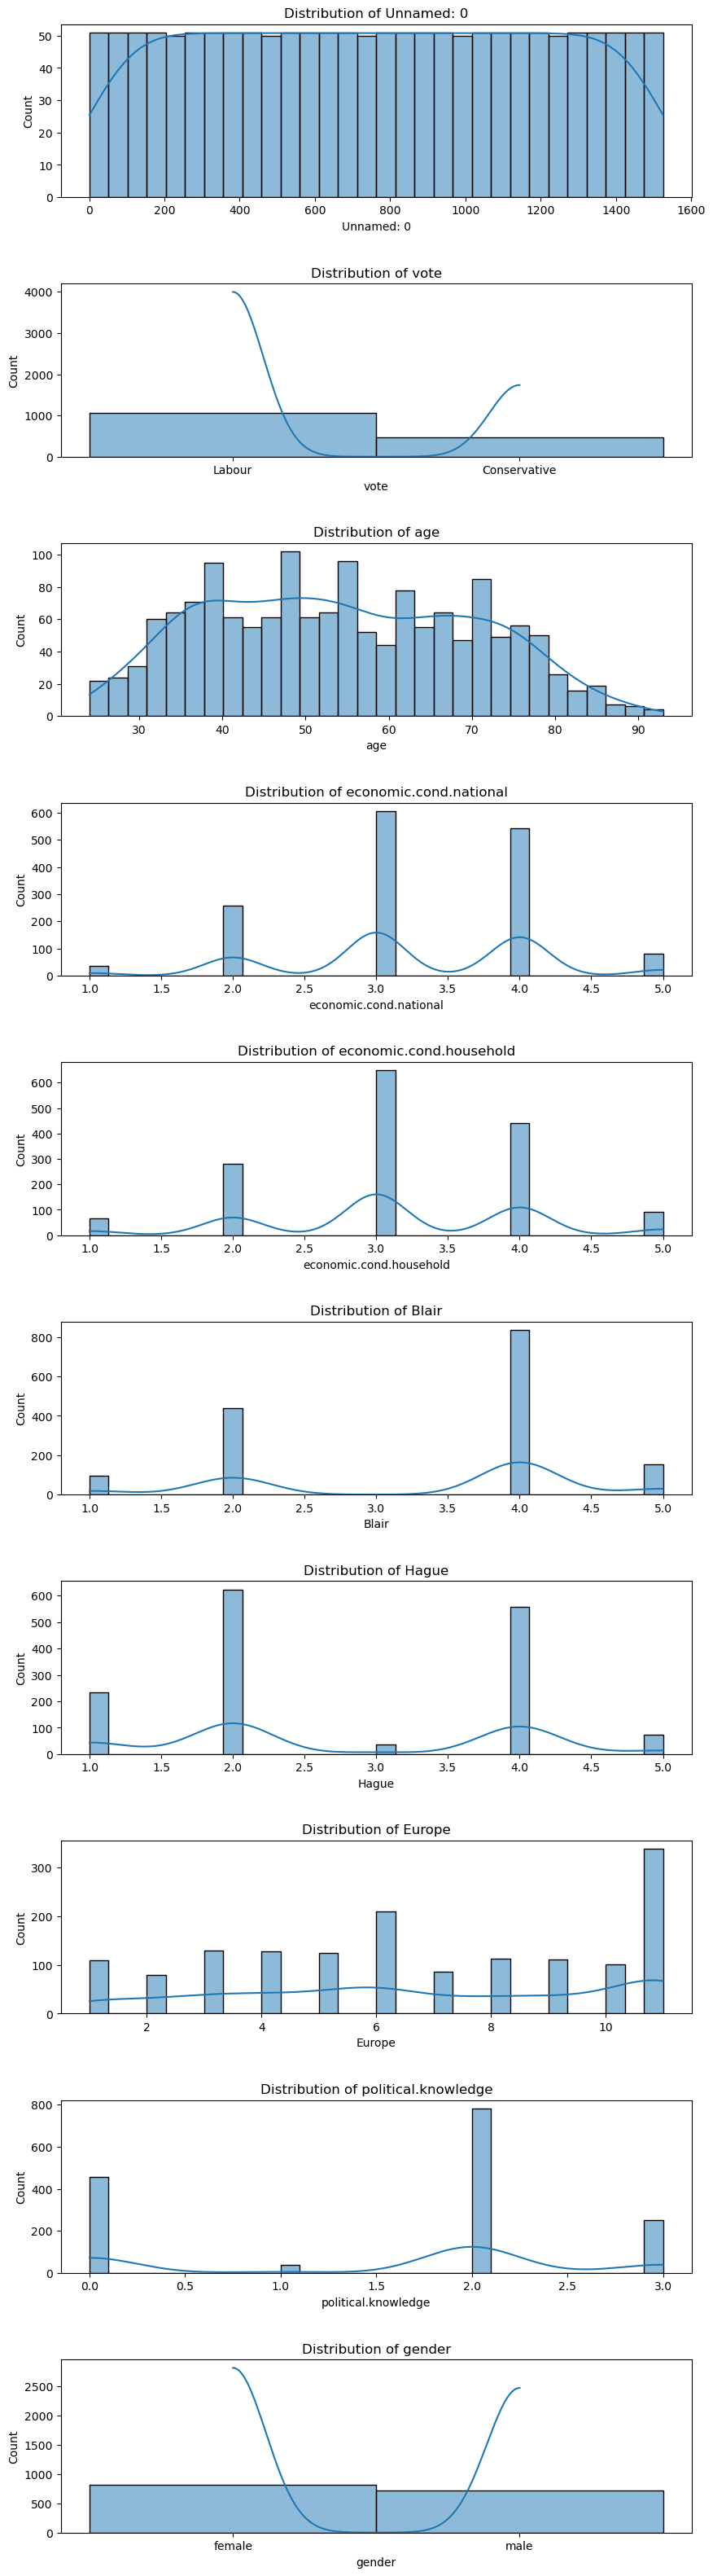

In [6]:
# Specify the variables for univariate analysis
variables = ['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 4 * len(variables)))
fig.subplots_adjust(hspace=0.5)

# Loop through each variable for univariate analysis
for i, variable in enumerate(variables):
    # Plot distribution using a histogram
    sns.histplot(df[variable], kde=True, ax=axes[i], bins=30)
    
    # Set plot labels and title
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {variable}')

# Show the plots
plt.show()

##### 3.Multivariate Analysis

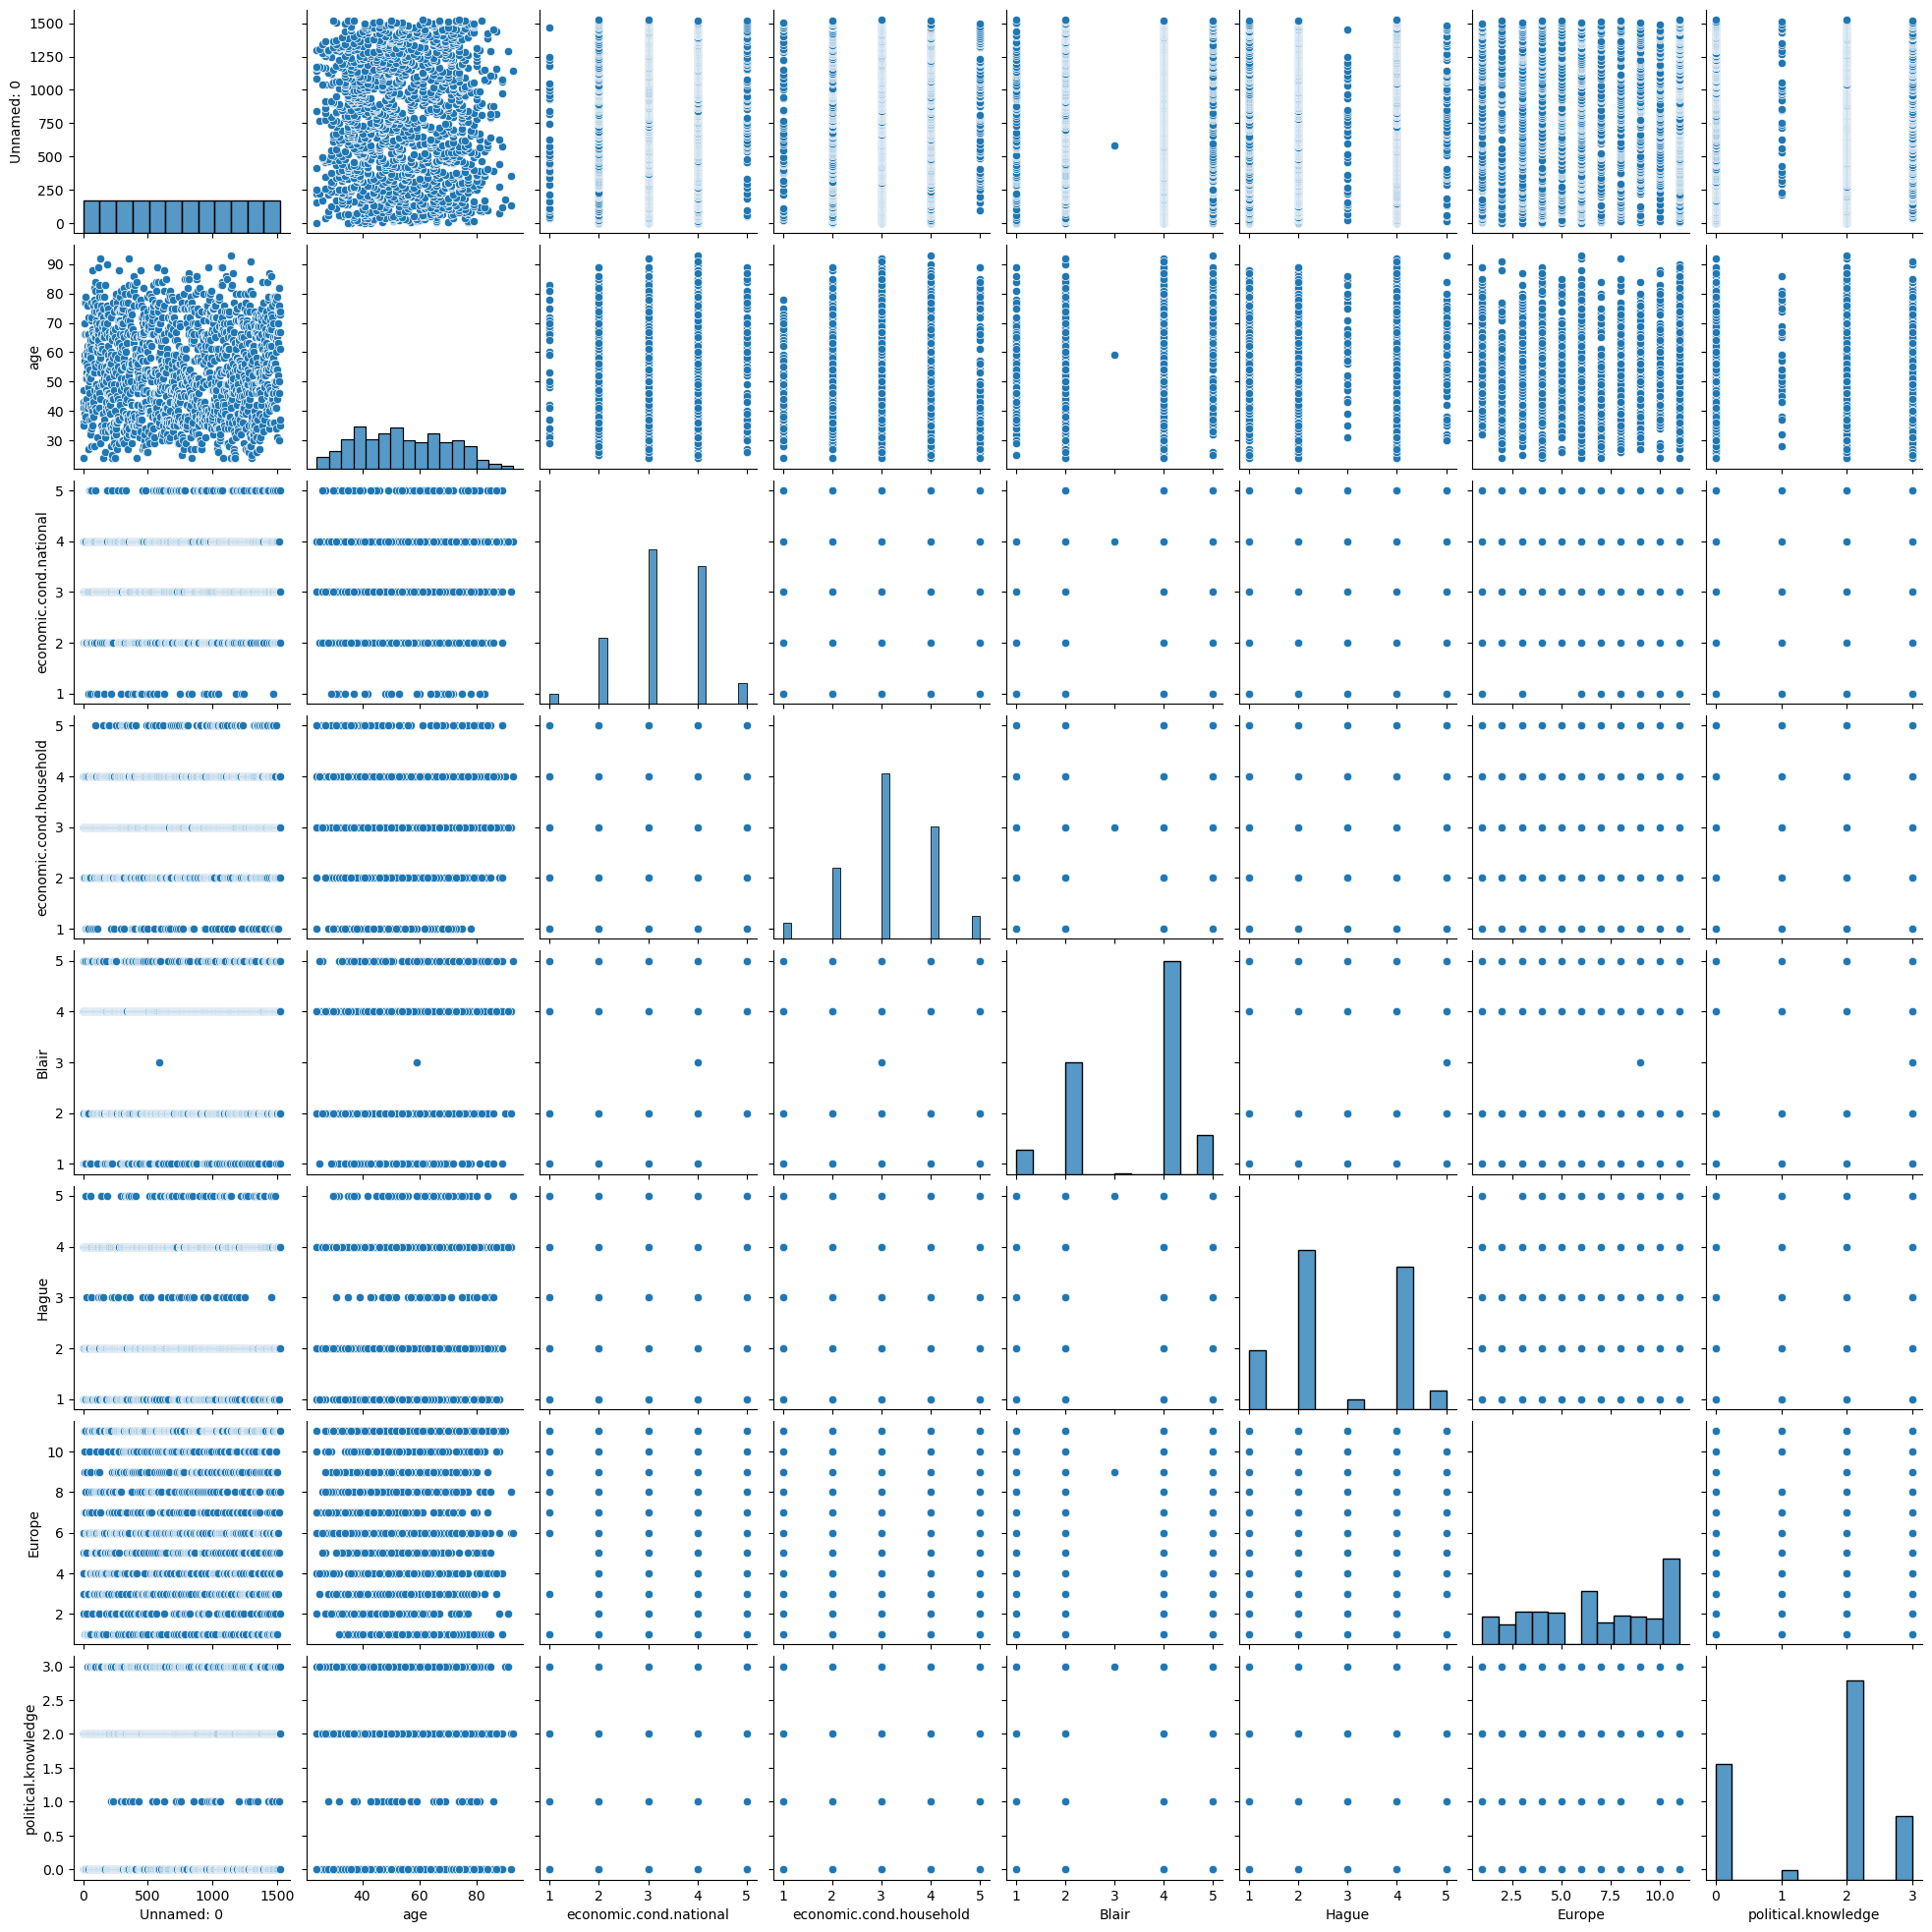

In [7]:
# Specify the variables for multivariate analysis
variables = ['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender']

# Create a pair plot for selected variables
sns.pairplot(df[variables])
plt.show()


##### 4.Use appropriate visualizations to identify the patterns and insights

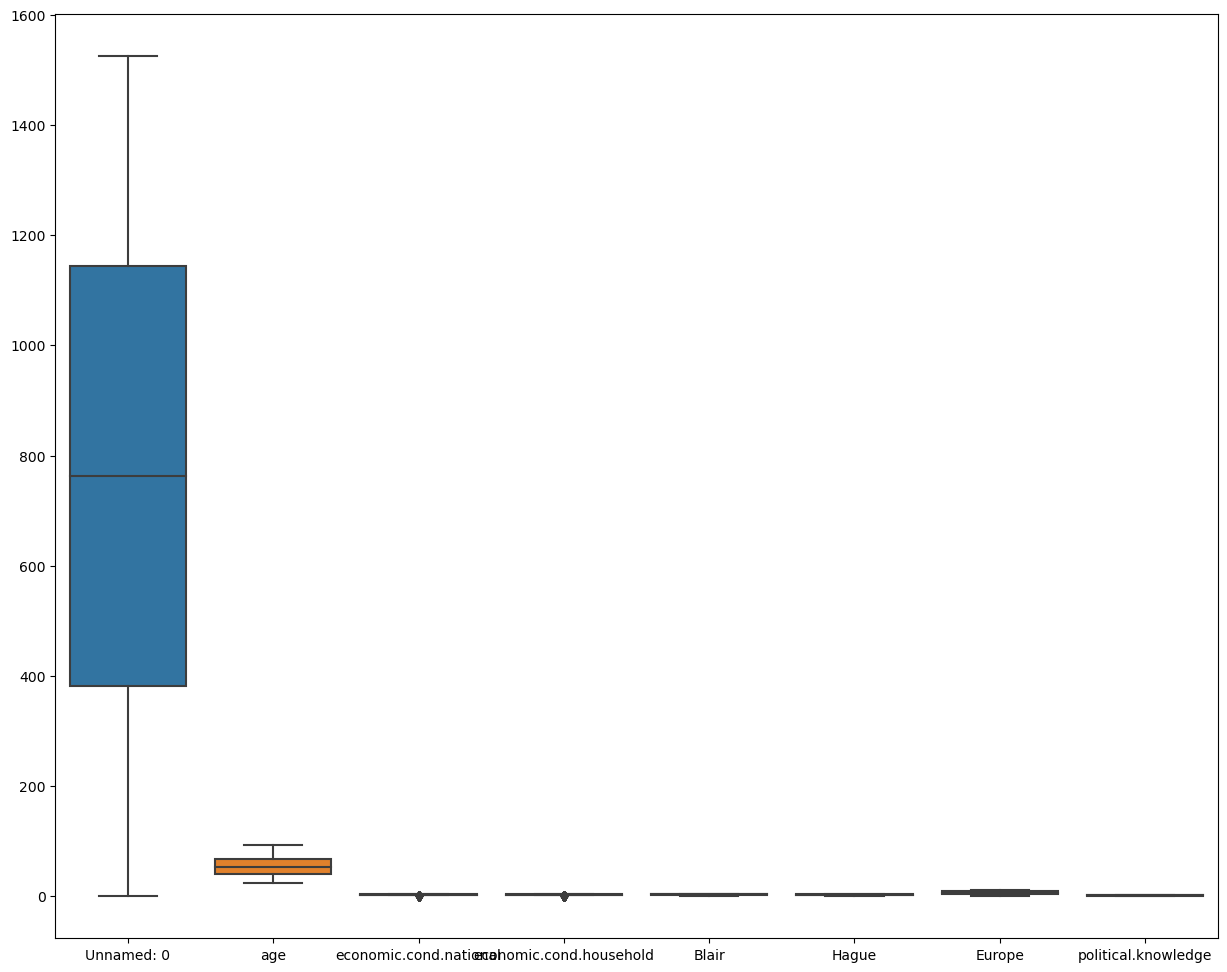

In [8]:
# Create box plots for each variable
plt.figure(figsize=(15, 12))
sns.boxplot(data=df[variables])
plt.show()


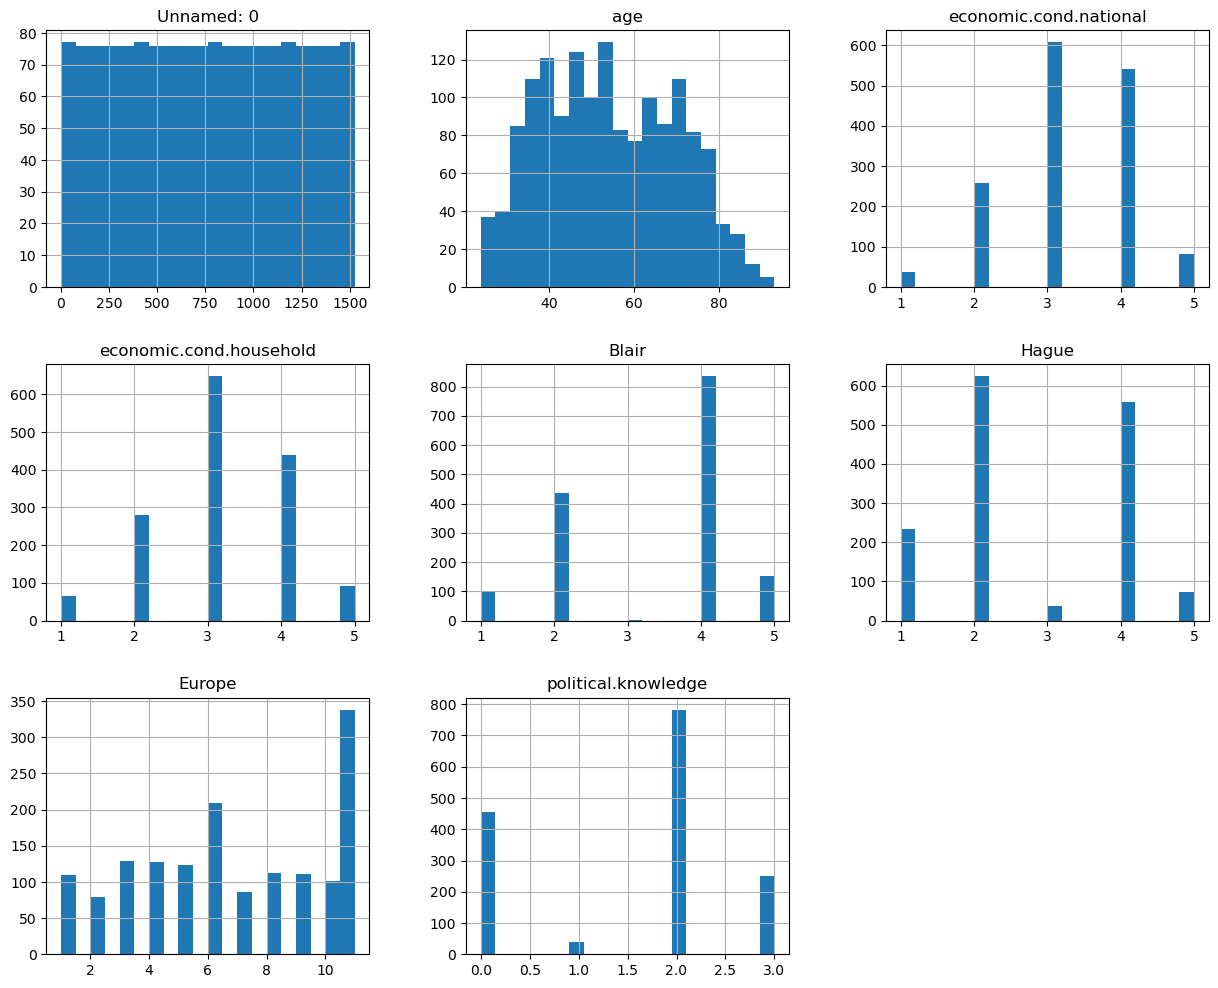

In [9]:
# Plot histograms for each variable
df[variables].hist(bins=20, figsize=(15, 12))
plt.show()


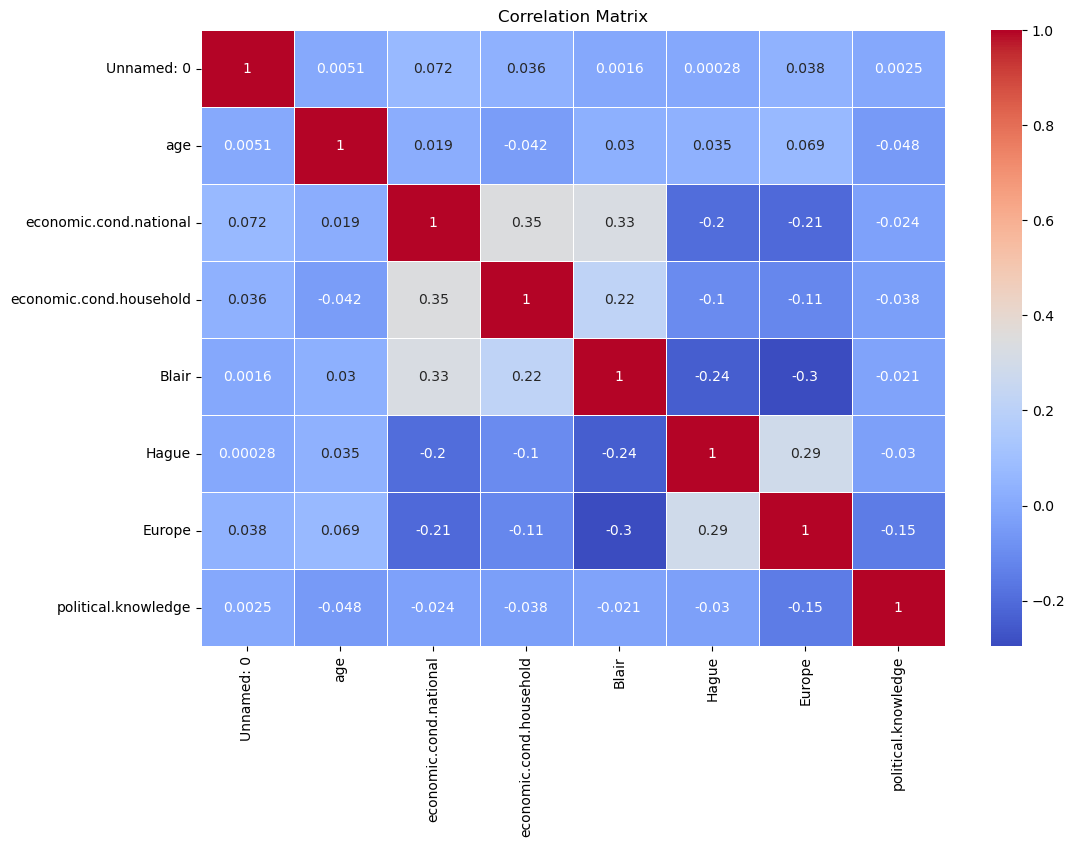

In [10]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### 5.Key meaningful observations on individual variables and the relationship between variables


1.Weak positive correlation between age and political knowledge:
Older adults tend to exhibit marginally higher political awareness.
There's a faint link between advanced age and increased understanding of politics.
While not substantial, older generations demonstrably score slightly higher on political knowledge tests.

2.Moderate positive correlation between national and household economic conditions:
Robust national economies tend to coincide with elevated household incomes.
Strong national economic performance demonstrably leads to improved financial status at the household level.
A thriving national economy is moderately linked to increased prosperity within individual households.

3.Weak positive correlation between household income and Blair vote:
Wealthier individuals exhibited a slight preference towards Blair.
There was a faint tendency for financially secure individuals to favor Blair.
While not significant, voters with higher incomes marginally leaned towards Blair.

4.Weak positive correlations between Blair vote and living in Europe, and between political knowledge and living in Europe:
There's a slight overlap between supporters of Blair and European residents.
Individuals with increased political knowledge and those residing in Europe exhibit a minor overlap.
There's a faint connection between supporting Blair and being European, and similarly between strong political knowledge and European residency.

5.Age has a positive correlation with Economic condition (household).
Older individuals tend to have better household finances.
There's a link between advanced age and improved economic standing within households.
Age demonstrably plays a role in increased household financial well-being.

6.Economic condition (household) has a positive correlation with Political knowledge.
Financially secure households tend to have individuals with greater political awareness.
Improved economic standing within households is linked to increased political knowledge.
There's a demonstrable connection between strong household finances and higher political understanding.

7.Economic condition (national) has a positive correlation with Economic condition (household).
A thriving national economy translates to improved household finances.
Robust national economic performance demonstrably leads to increased prosperity within individual households.
There's a strong link between a strong national economy and improved financial well-being at the household level.
8.Economic condition (national) has a positive correlation with Blairs.
Strong national economies were linked to increased support for Blair.
Robust national economic performance demonstrably played a role in garnering support for Blair.
There's a connection between thriving national economies and increased backing for Blair.

9.Blair has a positive correlation with Europe.
Supporters of Blair exhibited a slight association with being European.
There's a faint link between those backing Blair and European residency.
While not significant, voters supporting Blair marginally tended to be European.

10.Political knowledge has a positive correlation with Europe.
Individuals with strong political knowledge exhibited a faint association with being European.
There's a minor link between high political awareness and European residency.
While not significant, individuals with strong political knowledge marginally tended to be European.

### Problem 1 - Data Pre-processing

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


#### 1.Outlier Detection(treat, if needed))

In [12]:
# Analysing the data wheather it contains zero values or not ?
(df == 0).sum()

Unnamed: 0                   0
vote                         0
age                          0
economic.cond.national       0
economic.cond.household      0
Blair                        0
Hague                        0
Europe                       0
political.knowledge        455
gender                       0
dtype: int64

In [13]:
(df == 0).sum().sum()

455

In [14]:
#Printing tha zero values present in the data.
df.loc[~(df==0).all(axis=1)]

Unnamed: 0          vote  age  economic.cond.national  \
0              1        Labour   43                       3   
1              2        Labour   36                       4   
2              3        Labour   35                       4   
3              4        Labour   24                       4   
4              5        Labour   41                       2   
...          ...           ...  ...                     ...   
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
0                           3      4      1       2                    2   
1                           4      4      4       5                    2   
2                           4      5      2       3                    2   
3                           2      2      1       4                    0   
4                           2      1      1       6                    2   
...                       ...    ...    ...     ...                  ...   
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
0     female  
1       male  
2       male  
3     female  
4       male  
...      ...  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female  

[1525 rows x 10 columns]

<Axes: >

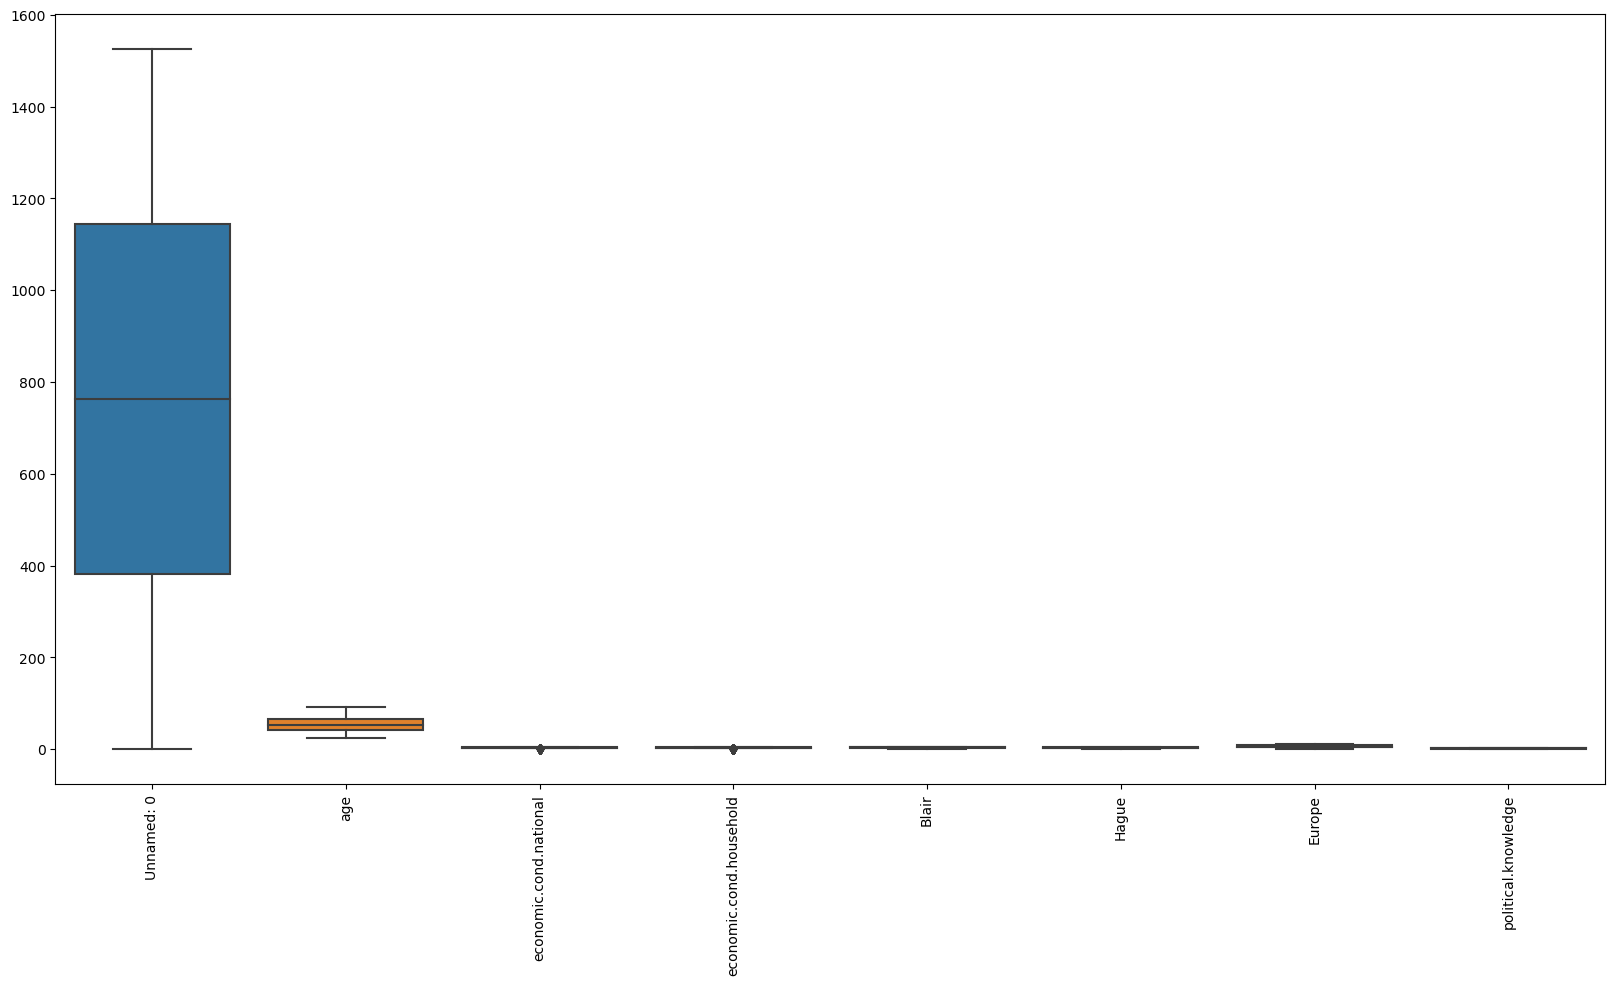

In [15]:
# Checking the outliers through boxplot.
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data=df)

In [16]:
# Removing the outliers using interquartile range.
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

<Axes: >

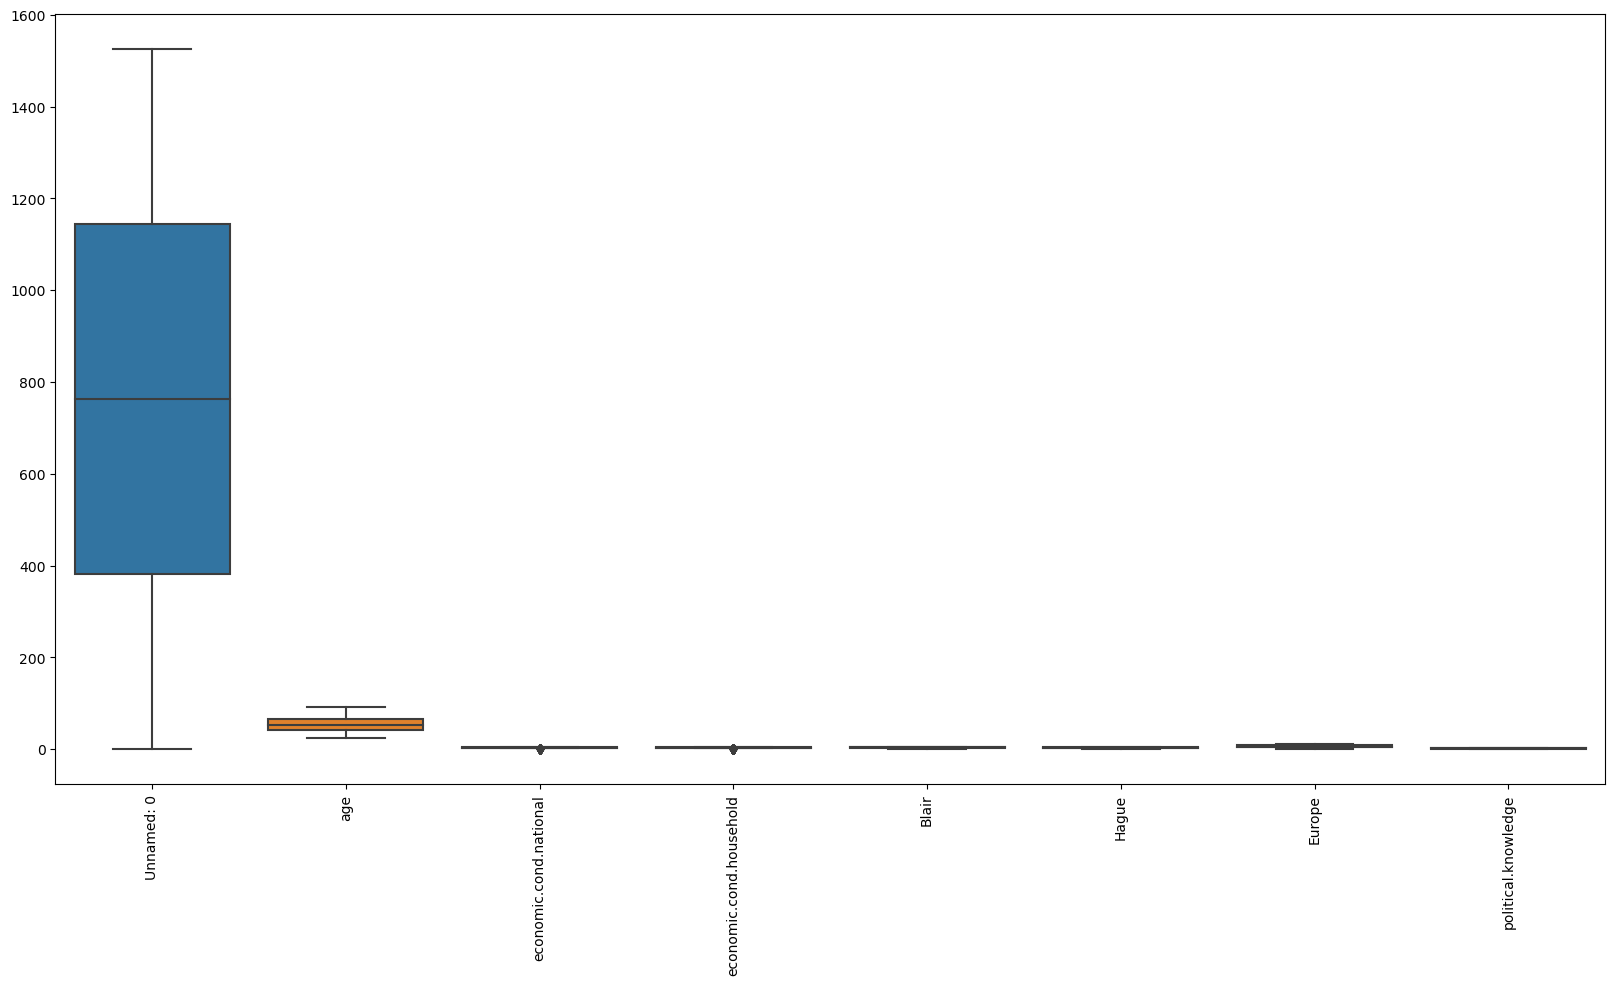

In [17]:
# Treating the outliers
# Plotting a boxplot to chech the outliers is removed or not?
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data=df)


In [18]:
# Checking for the duplicate values present in the dataset.
df.duplicated().sum()

0

##### 2.Encode the data 

In [19]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)
        

['vote', 'gender']
['Unnamed: 0', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [20]:
df = pd.get_dummies(df, columns=cat, drop_first=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Unnamed: 0               1525 non-null   int64
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   vote_Labour              1525 non-null   bool 
 9   gender_male              1525 non-null   bool 
dtypes: bool(2), int64(8)
memory usage: 98.4 KB


In [22]:
df.var()

Unnamed: 0                 193929.166667
age                           246.842075
economic.cond.national          0.776107
economic.cond.household         0.864810
Blair                           1.380212
Hague                           1.514631
Europe                         10.873759
political.knowledge             1.173571
vote_Labour                     0.211310
gender_male                     0.249110
dtype: float64

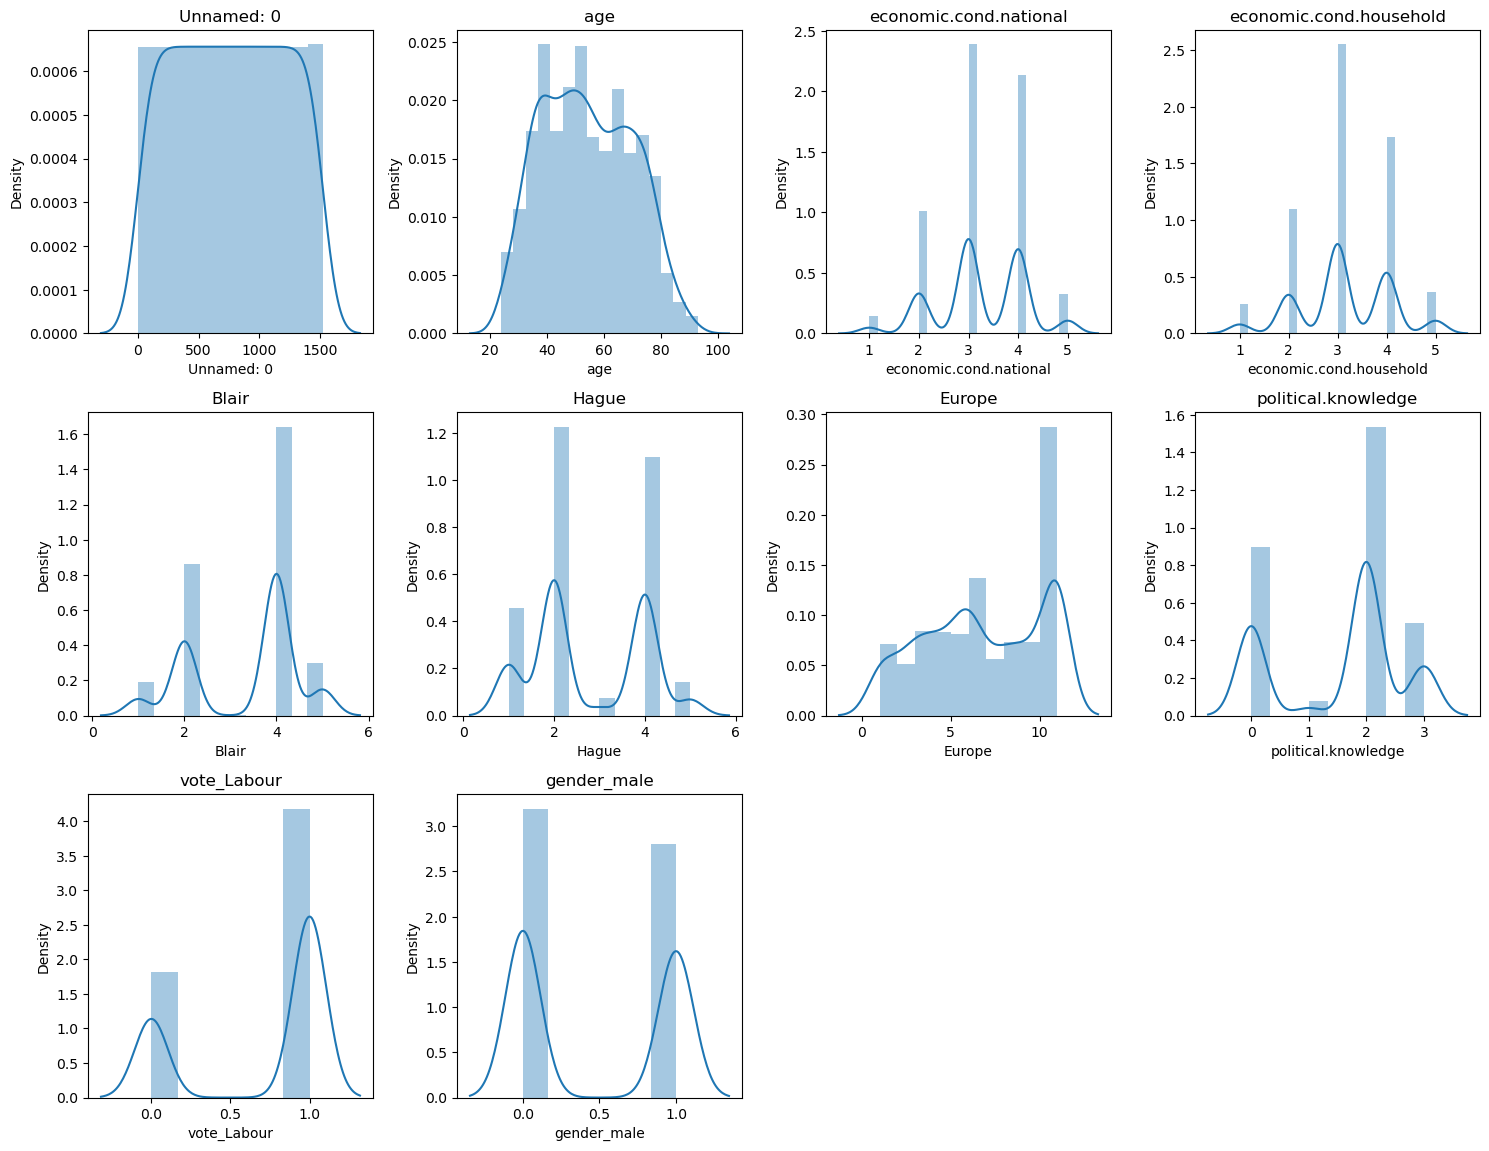

In [23]:
data_plot=df
fig=plt.figure(figsize=(15,15))
for i in range (0,len(df.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(df[df.columns[i]],hist=True)
    ax.set_title(df.columns[i],color='Black')
plt.tight_layout()
plt.show()


#### 3.Train Test Split 

In [24]:
from sklearn.model_selection import train_test_split
x = df.drop(['vote_Labour'], axis=1 ) # predictors
y = df['vote_Labour'] # target variable
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=10)
print('Train set size:', x_train.shape)
print('Test set size:', x_test.shape)


Train set size: (1067, 9)
Test set size: (458, 9)


In [25]:
# Copy all the predictor variables into X dataframe
X = df.drop(['vote_Labour'],axis=1)

# Copy target into the y dataframe. 
y = df[['vote_Labour']]

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.3, random_state=0)


print('Number of rows and columns of the training set for the independent variables:',X_train_LR.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train_LR.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test_LR.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test_LR.shape)

Number of rows and columns of the training set for the independent variables: (1067, 9)
Number of rows and columns of the training set for the dependent variable: (1067, 1)
Number of rows and columns of the test set for the independent variables: (458, 9)
Number of rows and columns of the test set for the dependent variable: (458, 1)


#### 4.Scaling the data

#### Scaling numerical features is essential for KNN accuracy, but minimal impact on other algorithms used in this study.

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

### Problem 1 - Model Building and Model Performance evaluation

### 1. Logistic Regression

In [27]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [28]:
Logistic_Model = LogisticRegression(solver='liblinear',max_iter=100,tol=0.0001,penalty ='l2',verbose = True, n_jobs=2)


In [29]:
Logistic_Model.fit(X_train_LR,y_train_LR)

[LibLinear]

LogisticRegression(n_jobs=2, solver='liblinear', verbose=True)

In [30]:
# training data prediction 
y_train_predict_LR=Logistic_Model.predict(X_train_LR)
# test data prediction 
y_test_prediction_LR=Logistic_Model.predict(X_test_LR)

In [31]:
# Train Data
y_train_predict_prob=Logistic_Model.predict_proba(X_train_LR)

pd.DataFrame(y_train_predict_prob).head()

0         1
0  0.673394  0.326606
1  0.062506  0.937494
2  0.042715  0.957285
3  0.463856  0.536144
4  0.008386  0.991614

In [32]:
# Test data
y_test_predict_prob=Logistic_Model.predict_proba(X_test_LR)
pd.DataFrame(y_test_predict_prob).head()

0         1
0  0.352527  0.647473
1  0.723213  0.276787
2  0.066105  0.933895
3  0.544779  0.455221
4  0.089806  0.910194

In [33]:
Logistic_Model_train_acc=Logistic_Model.score(X_train_LR,y_train_LR)
Logistic_Model_train_acc

0.8341143392689785

In [34]:
Logistic_Model_test_acc=Logistic_Model.score(X_test_LR,y_test_LR)
Logistic_Model_test_acc

0.8296943231441049

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.890


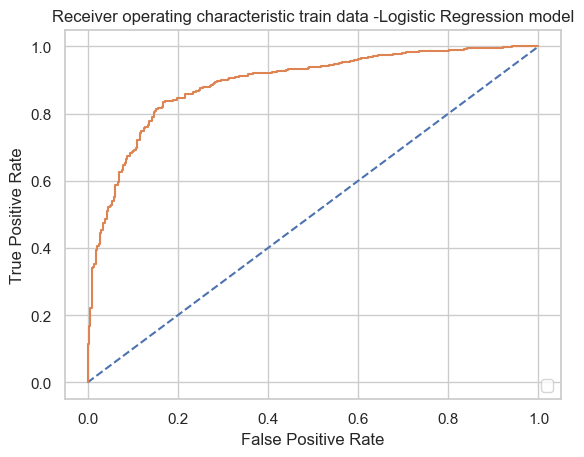

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# predict probabilities
probs = Logistic_Model.predict_proba(X_train_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logist_train_auc = roc_auc_score(y_train_LR, probs)
print('AUC: %.3f' % Logist_train_auc)
# calculate roc curve
Logist_train_fpr,Logist_train_tpr,Logist_train_thresholds = roc_curve(y_train_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logist_train_fpr, Logist_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Logistic Regression model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.886


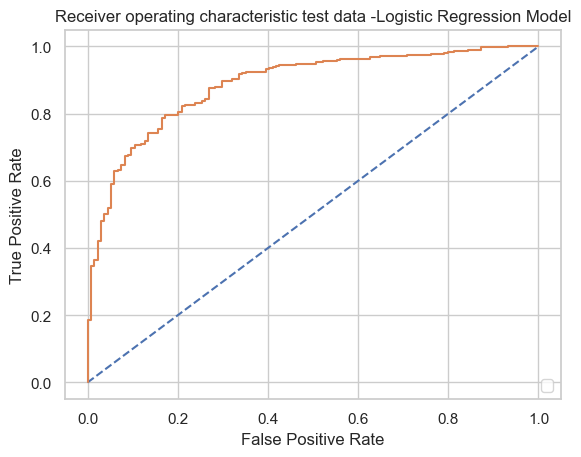

In [36]:
# predict probabilities
probs = Logistic_Model.predict_proba(X_test_LR)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logist_test_auc = roc_auc_score(y_test_LR, probs)
print('AUC: %.3f' % Logist_test_auc)
# calculate roc curve
Logist_test_fpr, Logist_test_tpr, Logist_testthresholds = roc_curve(y_test_LR, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logist_test_fpr, Logist_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -Logistic Regression Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [37]:
y_train_predict = Logistic_Model.predict(X_train_LR)
y_test_predict = Logistic_Model.predict(X_test_LR)

In [38]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

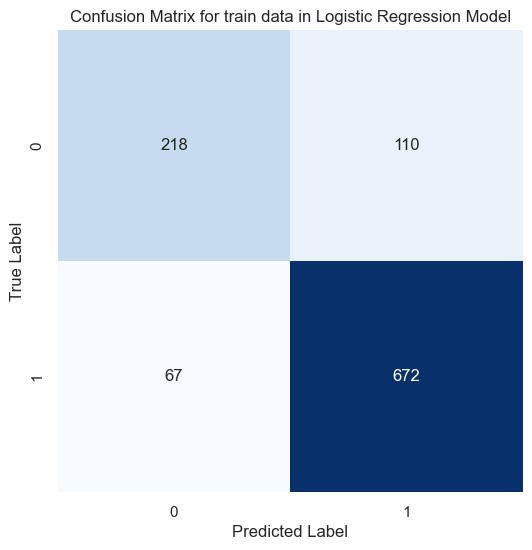

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Logistic_Model is your trained logistic regression model
y_pred = Logistic_Model.predict(X_train_LR)

# Calculate confusion matrix
cm = confusion_matrix(y_train_LR, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train data in Logistic Regression Model')
plt.show()


Logistic regression model achieved 890 correct predictions (TP+TN) and 177 incorrect predictions (FP+FN) on training data.
Confusion matrix shows 672 true positives, 218 true negatives, 110 false positives, and 67 false negatives for the logistic regression model.



Plotting the values in a Bar plot for better understanding.

In [41]:
X_train_LR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067 entries, 1398 to 684
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Unnamed: 0               1067 non-null   int64
 1   age                      1067 non-null   int64
 2   economic.cond.national   1067 non-null   int64
 3   economic.cond.household  1067 non-null   int64
 4   Blair                    1067 non-null   int64
 5   Hague                    1067 non-null   int64
 6   Europe                   1067 non-null   int64
 7   political.knowledge      1067 non-null   int64
 8   gender_male              1067 non-null   bool 
dtypes: bool(1), int64(8)
memory usage: 76.1 KB


<Axes: title={'center': 'Feature Importance'}>

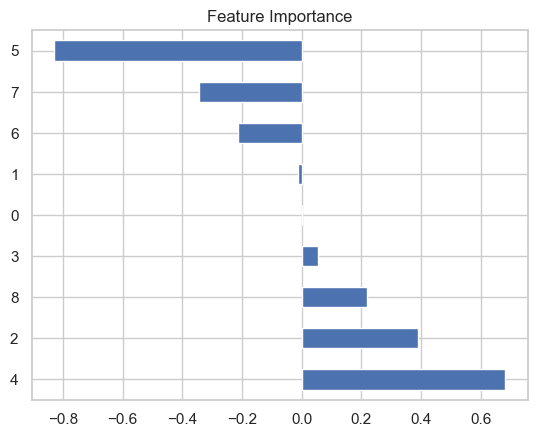

In [42]:
importance = Logistic_Model.coef_[0]
#importance is a list so you can plot it. 

feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

Feature: 0, Score: -0.00009
Feature: 1, Score: -0.01132
Feature: 2, Score: 0.39060
Feature: 3, Score: 0.05637
Feature: 4, Score: 0.68178
Feature: 5, Score: -0.82884
Feature: 6, Score: -0.21479
Feature: 7, Score: -0.34370
Feature: 8, Score: 0.21756


<Axes: title={'center': 'Feature Importance'}>

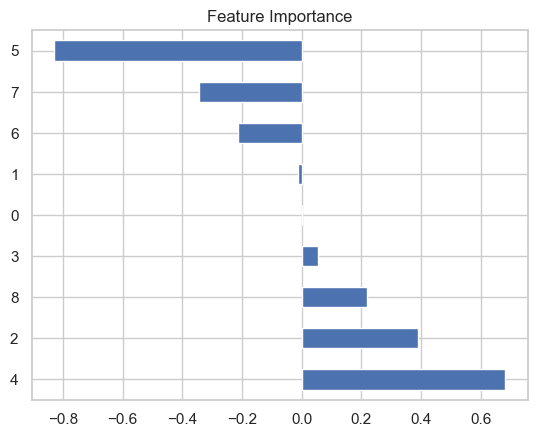

In [43]:
# get importance
importance =Logistic_Model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# importance = Logistic_Model.coef_[0]
feature_importance=pd.DataFrame({'feature':list(X_train_LR.columns),'feature_importance':[abs(i) for i in Logistic_Model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
importance = Logistic_Model.coef_[0]
#importance is a list so you can plot it. 

feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')


# Inferences Logistic Regression Model:
1.Impact of variables: Independent variables with larger absolute values have a greater impact on the target variable. This suggests that scaling the variables might be important to ensure fairness and avoid one variable dominating the prediction.
2.Variable importance: The order of importance suggests that "Hague" has the strongest negative influence (potentially decreasing the probability of the target class), followed by "Blair" with a positive influence, then "political.knowledge" with a negative influence, and so on.
3.Least important variables: "Age", "economic.cond.household", and "gender" seem to have the least impact on the model's predictions.
4.Overfitting: Similar train and test accuracy along with high ROC-AUC score indicate that the model is not likely overfitting, which is good news for its generalizability.


In [44]:
print(classification_report(y_train_LR,y_train_predict))


              precision    recall  f1-score   support

       False       0.76      0.66      0.71       328
        True       0.86      0.91      0.88       739

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [45]:
confusion_matrix(y_train_LR, y_train_predict_LR)

array([[218, 110],
       [ 67, 672]], dtype=int64)

Interpretation that 83 % of the vote were given to Labour party ,Recall is 91% ,Precision is 86% and F1 -score is 88% .These figures looks great and model is a overall a good model .

Confusion Matrix for test data

In [46]:
y_train_predict_LR = Logistic_Model.predict(X_train_LR)
y_test_predict_LR = Logistic_Model.predict(X_test_LR)

In [47]:
confusion_matrix(y_test_LR, y_test_predict_LR)

array([[ 94,  40],
       [ 38, 286]], dtype=int64)

TP-A true positive is an outcome where the model correctly predicts the positive class(286) TN- A true Negative is an outcome termed negative that the model has successfully predicted(94) FP-A false postive is an outcome which is predicted yes but in actual it is no(40) FN-A false negative is a n outcome which is predicted No but it is actual Yes(38). This confusion matrix for test data in Logistic Regression Model says that we have 74 as total incorrect predictions and 382 are the total correct predictions .

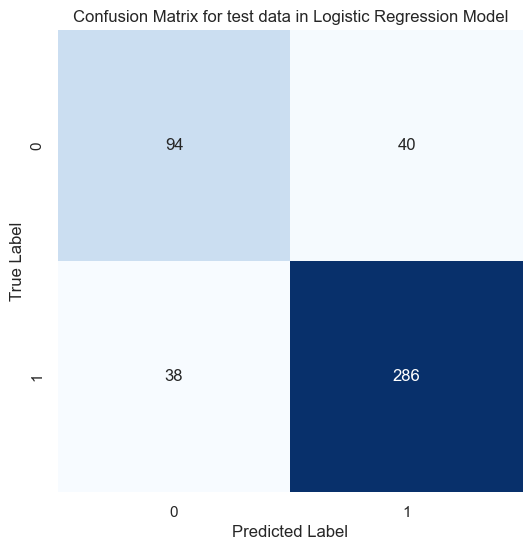

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Logistic_Model is your trained logistic regression model
y_pred_test = Logistic_Model.predict(X_test_LR)

# Calculate confusion matrix for test data
cm_test = confusion_matrix(y_test_LR, y_pred_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test data in Logistic Regression Model')
plt.show()


This confusion matrix for test data in Logistic Regression Model says that we have 40+38 as total incorrect prediction and 94+286 as total correct prediction.

Confusion Matrix for test data in Logistic Regression Model

In [49]:
print(classification_report(y_test_LR, y_test_predict))

              precision    recall  f1-score   support

       False       0.71      0.70      0.71       134
        True       0.88      0.88      0.88       324

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



Recall is 88% ,Precision is 88% and F1 -score is 88% .It looks great and overall model is good.

### LDA(Linear Discriminant Analysis Model)

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [51]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix


In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
X_train_LDA,X_test_LDA,y_train_LDA,y_test_LDA=train_test_split(X,y,test_size=.30,random_state=1)

In [54]:
LDA_Model = LinearDiscriminantAnalysis()

In [55]:
LDA_Model.fit(X_train_LDA,y_train_LDA)

LinearDiscriminantAnalysis()

In [56]:
posterior = LDA_Model.decision_function(X_train_LDA)
print(posterior)
print(np.exp(posterior))

[-0.64430097  1.68231756  1.4737361  ...  1.25401965  3.04096094
  0.34787464]
[ 0.52502942  5.3780054   4.36551472 ...  3.50440116 20.92534147
  1.41605472]


In [57]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_LDA= LDA_Model.predict(X_train_LDA)
print(pred_class_train_LDA)


[False  True  True ...  True  True  True]


In [58]:
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_LDA = LDA_Model.predict(X_test_LDA)

print(pred_class_test_LDA)

[False False  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False False  True  True  True False False  True False  True
  True False  True  True False  True False False False  True  True  True
  True False  True  True False  True False  True  True  True  True  True
  True  True  True  True False False  True  True  True  True  True False
  True  True False False  True  True False  True False  True  True False
  True  True  True False  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True False False  True False
 False  True  True  True False  True  True  True  True False  True  True
 False  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True
 False False  True  True False  True  True  True  T

In [59]:
ytest_predict_prob_LDA=LDA_Model.predict_proba(X_test_LDA)
pd.DataFrame(ytest_predict_prob_LDA).head()

0         1
0  0.950899  0.049101
1  0.745815  0.254185
2  0.321758  0.678242
3  0.484760  0.515240
4  0.135276  0.864724

In [60]:
ytrain_predict_prob_LDA=LDA_Model.predict_proba(X_train_LDA)
pd.DataFrame(ytrain_predict_prob_LDA).head()

0         1
0  0.655725  0.344275
1  0.156789  0.843211
2  0.186375  0.813625
3  0.136064  0.863936
4  0.040668  0.959332

In [61]:
# Training Data Probability Prediction in LDA MOdel
# ?model.predict_proba

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
pred_prob_train_LDA = LDA_Model.predict_proba(X_train_LDA)

# Test Data Probability Prediction in LDA MOdel 
pred_prob_test_LDA = LDA_Model.predict_proba(X_test_LDA)

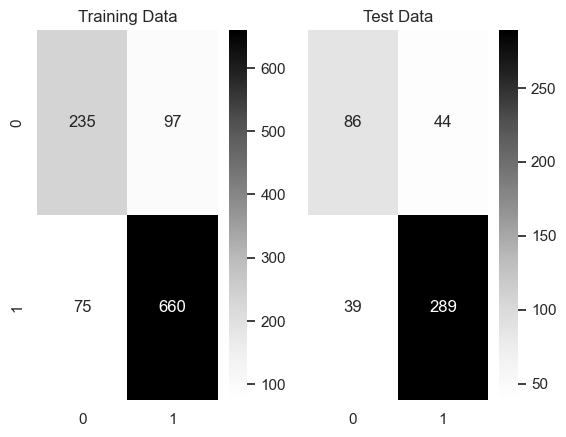

In [62]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_LDA,pred_class_train_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test_LDA,pred_class_test_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

True Positives (TP): 660, indicating the model correctly identifies positive cases most of the time.
True Negatives (TN): 223, indicating the model correctly identifies negative cases moderately well.
False Positives (FP): 99, indicating the model incorrectly predicts positive cases somewhat frequently. This could lead to false alarms or misclassifications.
False Negatives (FN): 75, indicating the model misses true positive cases occasionally. This could be concerning depending on the cost of missing positive cases.


True Positives (TP): 289, similar to Matrix 1, suggesting good identification of positive cases.
True Negatives (TN): 86, significantly lower than Matrix 1, highlighting the potential class imbalance.
False Positives (FP): 44, lower than Matrix 1, indicating fewer incorrect positive predictions.
False Negatives (FN): 39, slightly lower than Matrix 1, showing some improvement in identifying true positive cases.



LDA Model accuracy Score for train Data

In [63]:
LDA_train_acc=LDA_Model.score(X_train_LDA,y_train_LDA)
LDA_train_acc

0.8388003748828491

LDA Model accuracy score for test data

In [64]:
LDA_test_acc=LDA_Model.score(X_test_LDA,y_test_LDA)
LDA_test_acc

0.8187772925764192

Evaluation metrics classification report ,confusion matrix for train and test data in LDA MOdel

In [65]:
print(classification_report(y_train_LDA,y_train_predict))

              precision    recall  f1-score   support

       False       0.32      0.28      0.30       332
        True       0.69      0.74      0.71       735

    accuracy                           0.59      1067
   macro avg       0.51      0.51      0.51      1067
weighted avg       0.58      0.59      0.59      1067



In [66]:
print(classification_report(y_test_LDA, y_test_predict))

              precision    recall  f1-score   support

       False       0.28      0.28      0.28       130
        True       0.71      0.71      0.71       328

    accuracy                           0.59       458
   macro avg       0.50      0.50      0.50       458
weighted avg       0.59      0.59      0.59       458



In [67]:
# Training Data Probability Prediction in LDA Model
# ?model.predict_proba

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
pred_prob_train_LDA = LDA_Model.predict_proba(X_train_LDA)

# Test Data Probability Prediction in LDA Model
pred_prob_test_LDA = LDA_Model.predict_proba(X_test_LDA)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.890


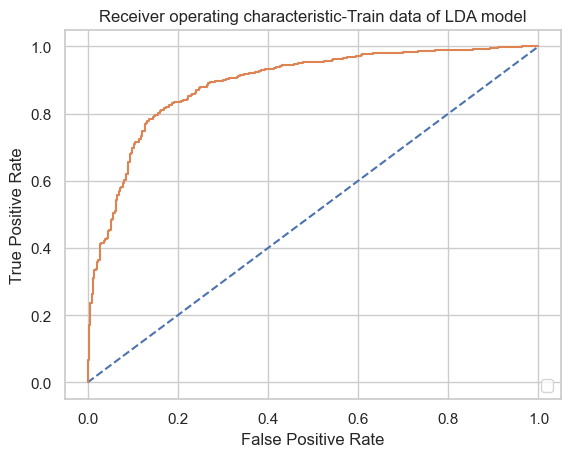

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.889


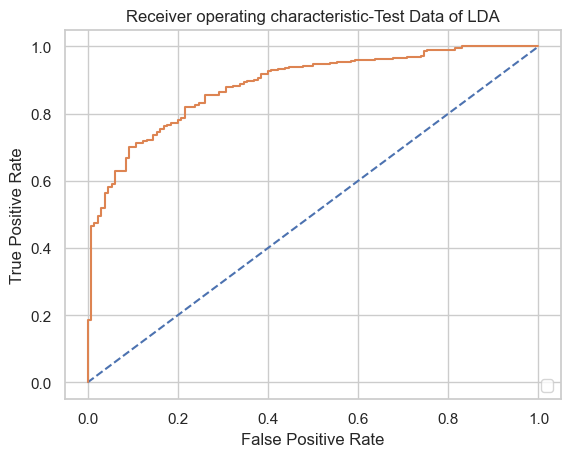

In [68]:
# AUC and ROC for the training data in LDA MOdel
# predict probabilities
probs = LDA_Model.predict_proba(X_train_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train_LDA, probs)
print('AUC: %.3f' % Logist_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-Train data of LDA model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# AUC and ROC for the test data in LDA Model

# predict probabilities
probs = LDA_Model.predict_proba(X_test_LDA)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test_LDA, probs)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test_LDA, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-Test Data of LDA')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC_AUC -Scores
Train set:89% || Test set:88%

In the LDA model as well ,we will proceed at the feature coefficient values and how much each feature influences the result.

Plotting the coefficient values in a Bar plot for better understanding.

In [69]:
X_train_LDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067 entries, 1453 to 1061
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Unnamed: 0               1067 non-null   int64
 1   age                      1067 non-null   int64
 2   economic.cond.national   1067 non-null   int64
 3   economic.cond.household  1067 non-null   int64
 4   Blair                    1067 non-null   int64
 5   Hague                    1067 non-null   int64
 6   Europe                   1067 non-null   int64
 7   political.knowledge      1067 non-null   int64
 8   gender_male              1067 non-null   bool 
dtypes: bool(1), int64(8)
memory usage: 76.1 KB


Feature: 0, Score: -0.00006
Feature: 1, Score: -0.02562
Feature: 2, Score: 0.35246
Feature: 3, Score: 0.15036
Feature: 4, Score: 0.70338
Feature: 5, Score: -0.96727
Feature: 6, Score: -0.25829
Feature: 7, Score: -0.57240
Feature: 8, Score: 0.25223


<Axes: title={'center': 'Feature Importance'}>

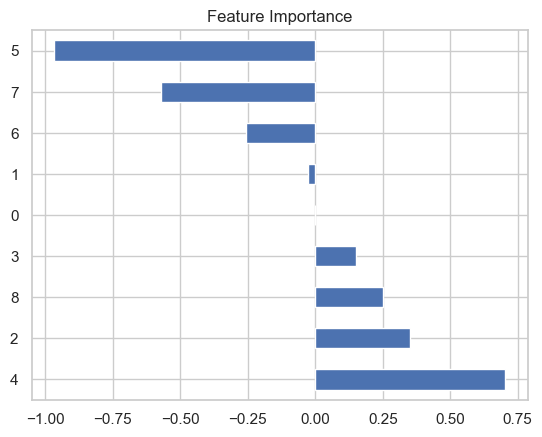

In [70]:
# get importance
importance =LDA_Model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# importance = Logistic_Model.coef_[0]
feature_importance=pd.DataFrame({'feature':list(X_train_LDA.columns),'feature_importance':[abs(i) for i in LDA_Model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
importance = LDA_Model.coef_[0]
#importance is a list so you can plot it. 

feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

#### Inferences-LDA Model:
1.Order of importance of predictors-"Hague">"Blair">"political.knowledge">"economic.cond.national">"Europe". 2.Predictors "age","gender" and "economic.cond.household" are least important . 3.Train accuracy and test accuracy & ROC-AUC scores are very similar ,hence thi smodel doenot suffers from overfitting .

# 2.Apply KNN Model,Naive Bayes, Bagging, Boosting 

In [72]:
# Import the libraries:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt


Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now apply z-score on continues columns and see the performance for KNN.

In [73]:
# Scaling for KNN Model
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances

In [74]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

Unnamed: 0           age  economic.cond.national  \
count  1525.000000  1.525000e+03            1.525000e+03   
mean      0.000000  1.013397e-16           -7.454875e-17   
std       1.000328  1.000328e+00            1.000328e+00   
min      -1.730915 -1.921698e+00           -2.550189e+00   
25%      -0.865458 -8.393129e-01           -2.792178e-01   
50%       0.000000 -7.527638e-02           -2.792178e-01   
75%       0.865458  8.160995e-01            8.562679e-01   
max       1.730915  2.471512e+00            1.991754e+00   

       economic.cond.household         Blair         Hague        Europe  \
count             1.525000e+03  1.525000e+03  1.525000e+03  1.525000e+03   
mean              7.454875e-17  1.677347e-16  1.164824e-17 -1.327900e-16   
std               1.000328e+00  1.000328e+00  1.000328e+00  1.000328e+00   
min              -2.302303e+00 -1.987695e+00 -1.419886e+00 -1.737782e+00   
25%              -1.509476e-01 -1.136225e+00 -6.070758e-01 -8.277143e-01   
50%              -1.509476e-01  5.667164e-01 -6.070758e-01 -2.210023e-01   
75%               9.247302e-01  5.667164e-01  1.018544e+00  9.924217e-01   
max               2.000408e+00  1.418187e+00  1.831354e+00  1.295778e+00   

       political.knowledge   gender_male  
count         1.525000e+03  1.525000e+03  
mean         -8.153769e-17 -5.125226e-17  
std           1.000328e+00  1.000328e+00  
min          -1.424148e+00 -9.370586e-01  
25%          -1.424148e+00 -9.370586e-01  
50%           4.226427e-01 -9.370586e-01  
75%           4.226427e-01  1.067169e+00  
max           1.346038e+00  1.067169e+00

In [75]:
XScaled.head()
# all column adjusted to zero mean and standard deviation to 1.

Unnamed: 0       age  economic.cond.national  economic.cond.household  \
0   -1.730915 -0.711973               -0.279218                -0.150948   
1   -1.728644 -1.157661                0.856268                 0.924730   
2   -1.726372 -1.221331                0.856268                 0.924730   
3   -1.724101 -1.921698                0.856268                -1.226625   
4   -1.721829 -0.839313               -1.414704                -1.226625   

      Blair     Hague    Europe  political.knowledge  gender_male  
0  0.566716 -1.419886 -1.434426             0.422643    -0.937059  
1  0.566716  1.018544 -0.524358             0.422643     1.067169  
2  1.418187 -0.607076 -1.131070             0.422643     1.067169  
3 -1.136225 -1.419886 -0.827714            -1.424148    -0.937059  
4 -1.987695 -1.419886 -0.221002             0.422643     1.067169

In [76]:
# Split X and y into training and test set in 70:30 ratio

X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(XScaled, y, test_size=0.30, random_state=0)

KNN Model(Without Tuning )

In [77]:
KNN_model=KNeighborsClassifier(n_neighbors= 5,weights='uniform',algorithm='auto',n_jobs=None )

In [78]:
# Call Nearest Neighbour algorithm and fit the model

KNN_model.fit(X_train_KNN, y_train_KNN)


KNeighborsClassifier()

In [80]:
# KNeighborsClassifier?

predicted_labels = KNN_model.predict(X_test_KNN)
KNN_model.score(X_test_KNN, y_test_KNN)

0.8165938864628821

In [81]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
KNN_model_score_train = KNN_model.score(X_train_KNN, y_train_KNN)
print(KNN_model_score_train)
print(metrics.confusion_matrix(y_train_KNN, y_train_predict_KNN))
print(metrics.classification_report(y_train_KNN, y_train_predict_KNN))

0.8734770384254921
[[252  76]
 [ 59 680]]
              precision    recall  f1-score   support

       False       0.81      0.77      0.79       328
        True       0.90      0.92      0.91       739

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067



In [82]:
## Performance Matrix on test data set
## Performance Matrix on train data set
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
KNN_model_score_test = KNN_model.score(X_test_KNN, y_test_KNN)
print(KNN_model_score_test)
print(metrics.confusion_matrix(y_test_KNN, y_test_predict_KNN))
print(metrics.classification_report(y_test_KNN, y_test_predict_KNN))

0.8165938864628821
[[ 95  39]
 [ 45 279]]
              precision    recall  f1-score   support

       False       0.68      0.71      0.69       134
        True       0.88      0.86      0.87       324

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.82      0.82      0.82       458



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.941


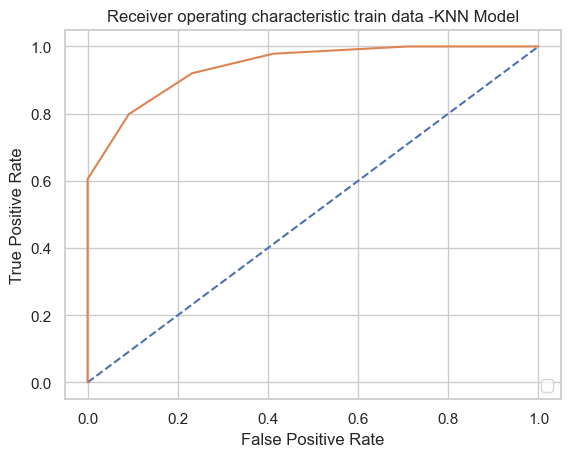

In [83]:
probs = KNN_model.predict_proba(X_train_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train_KNN, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_trainthresholds = roc_curve(y_train_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.844


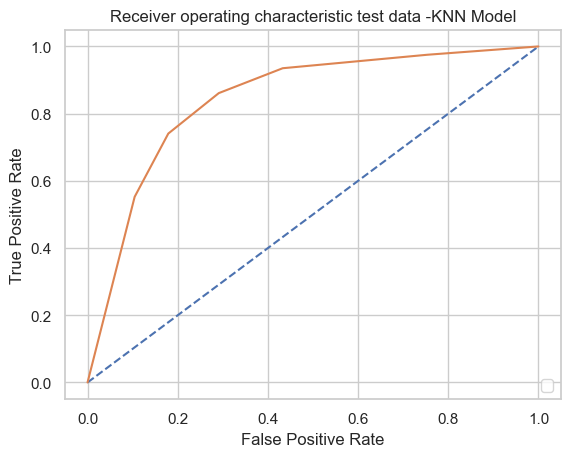

In [84]:
# predict probabilities
probs = KNN_model.predict_proba(X_test_KNN)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test_KNN, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_testthresholds = roc_curve(y_test_KNN, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -KNN Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


ROC-AUC Scores:
Train Set:94% |Test set:84%

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score

KNN_train_precision = precision_score(y_train_KNN, y_train_predict_KNN, pos_label=1)
KNN_train_recall = recall_score(y_train_KNN, y_train_predict_KNN, pos_label=1)
KNN_train_f1 = f1_score(y_train_KNN, y_train_predict_KNN, pos_label=1)

print('KNN_train_precision:', round(KNN_train_precision, 2))
print('KNN_train_recall:', round(KNN_train_recall, 2))
print('KNN_train_f1:', round(KNN_train_f1, 2))


KNN_train_precision: 0.9
KNN_train_recall: 0.92
KNN_train_f1: 0.91


In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score

KNN_test_precision = precision_score(y_test_KNN, y_test_predict_KNN, pos_label=1)
KNN_test_recall = recall_score(y_test_KNN, y_test_predict_KNN, pos_label=1)
KNN_test_f1 = f1_score(y_test_KNN, y_test_predict_KNN, pos_label=1)

print('KNN_test_precision:', round(KNN_test_precision, 2))
print('KNN_test_recall:', round(KNN_test_recall, 2))
print('KNN_test_f1:', round(KNN_test_f1, 2))


KNN_test_precision: 0.88
KNN_test_recall: 0.86
KNN_test_f1: 0.87


Now, Run the KNN model with no of neighbours to be 1,3,5..19 and *Find out the optimal no. of neighbours from K=1,3,5,7....19 using the Mis-classification error

Note: Mis-classification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [88]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_KNN, y_train_KNN)
    # evaluate test accuracy
    scores = knn.score(X_test_KNN, y_test_KNN)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


[0.22052401746724892,
 0.17030567685589515,
 0.1834061135371179,
 0.1834061135371179,
 0.17685589519650657,
 0.17030567685589515,
 0.16812227074235808,
 0.1746724890829694,
 0.16157205240174677,
 0.1593886462882096]

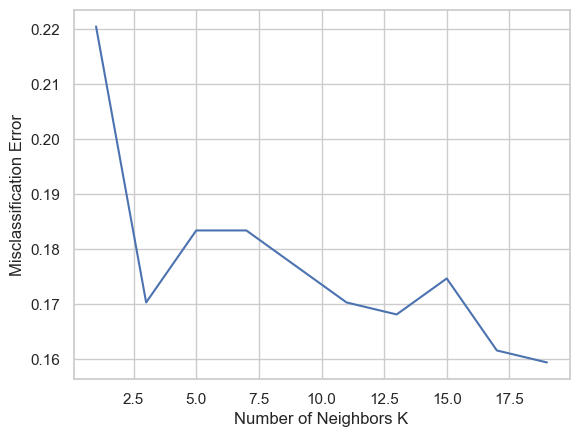

In [89]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K =5 it is giving the best test accuracy lets check train and test both with other evaluation metrics

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_model, X_train_KNN, y_train_KNN, cv=10)
scores

array([0.80373832, 0.77570093, 0.85046729, 0.77570093, 0.8411215 ,
       0.79439252, 0.86915888, 0.87735849, 0.80188679, 0.83018868])

In [91]:
scores = cross_val_score(KNN_model, X_test_KNN, y_test_KNN, cv=10)
scores

array([0.73913043, 0.82608696, 0.76086957, 0.82608696, 0.86956522,
       0.80434783, 0.7826087 , 0.76086957, 0.77777778, 0.88888889])

In [92]:
## After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. 
## Hence our model is valid.
## Students are advised to perform CV on other models and compare the results.

KNN Model(After Tuning)

In [93]:
param_grid = {'n_neighbors':[5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','brute','kd_tree'],'p':[2]}
KNN_model = KNeighborsClassifier()
                              
KNN_model.fit(X_train_KNN,y_train_KNN)

KNeighborsClassifier()

In [94]:
grid_search = GridSearchCV(estimator = KNN_model, param_grid = param_grid)

In [95]:
grid_search.fit(X_train_KNN,y_train_KNN)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute', 'kd_tree'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [96]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

In [97]:
best_grid = grid_search.best_estimator_

best_grid

KNeighborsClassifier(n_neighbors=9)

In [101]:
# Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train_KNN)
ytest_predict = best_grid.predict(X_test_KNN)


# KNN Model Performance Evaluation on Training data
confusion_matrix(y_train_KNN,ytrain_predict)



array([[245,  83],
       [ 64, 675]], dtype=int64)

In [102]:
KNNg_train_acc=best_grid.score(X_train_KNN,y_train_KNN) 
KNNg_train_acc

0.8622305529522024

In [103]:
print(classification_report(y_train_KNN,ytrain_predict))

              precision    recall  f1-score   support

       False       0.79      0.75      0.77       328
        True       0.89      0.91      0.90       739

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



Area under Curve is 0.9247644311693456


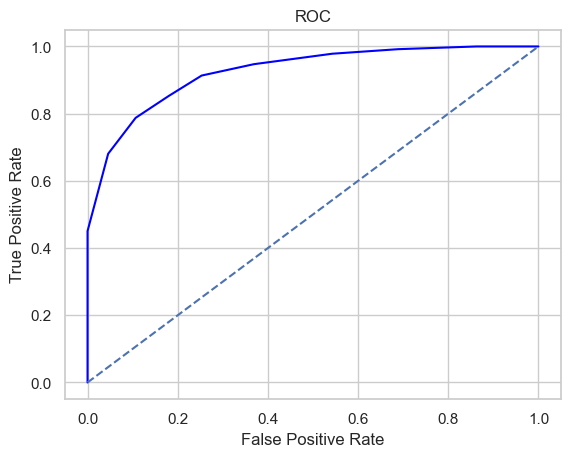

In [105]:
KNNg_train_fpr, KNNg_train_tpr,_=roc_curve(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
plt.plot(KNNg_train_fpr,KNNg_train_tpr,color='blue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNNg_train_auc=roc_auc_score(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
print('Area under Curve is', KNNg_train_auc)

In [106]:
# KNN Model Performance Evaluation on Test data

confusion_matrix(y_test_KNN,ytest_predict)

array([[ 97,  37],
       [ 44, 280]], dtype=int64)

In [107]:
KNNg_test_acc=best_grid.score(X_test_KNN,y_test_KNN)
KNNg_test_acc

0.8231441048034934

In [108]:
print(classification_report(y_test_KNN,ytest_predict))

              precision    recall  f1-score   support

       False       0.69      0.72      0.71       134
        True       0.88      0.86      0.87       324

    accuracy                           0.82       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



Area under Curve is 0.9247644311693456


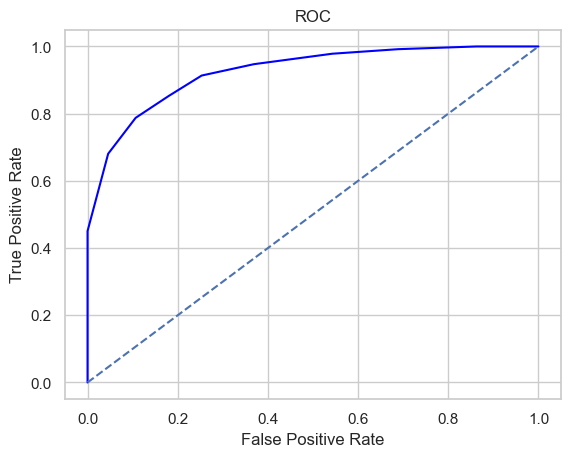

In [110]:
KNNg_train_fpr, KNNg_train_tpr,_=roc_curve(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
plt.plot(KNNg_train_fpr,KNNg_train_tpr,color='blue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNNg_train_auc=roc_auc_score(y_train_KNN,best_grid.predict_proba(X_train_KNN)[:,1])
print('Area under Curve is', KNNg_train_auc)

ROC-AUC scores:
Train set :92% |Test set:92%

Inferences KNN(After Tuning)

Emphasizing overfitting:
The large discrepancy between ROC and AUC scores on the training and test sets suggests the KNN model is significantly overfitting. This means the model performs well on training data but generalizes poorly to unseen data.
Untuned KNN falls victim to overfitting, evident from the substantial difference in performance between training and testing data.

Highlighting the benefits of hyperparameter tuning:
Tuning key hyperparameters of the KNN model leads to similar accuracy and ROC-AUC scores on both training and test sets, indicating improved generalizability.
By optimizing key hyperparameters, we successfully mitigate overfitting in the KNN model, resulting in consistent performance across both training and testing data.

Specifying the optimal parameters:
Fine-tuning KNN reveals optimal performance with 9 neighbors, using a "uniform" weight parameter and a Minkowski distance metric with p=2.
The best performing KNN configuration utilizes 9 neighbors, "uniform" weighting, and p=2 in the Minkowski distance metric.

####  Naive Bayes Model

In [111]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

Unnamed: 0           age  economic.cond.national  \
count  1525.000000  1.525000e+03            1.525000e+03   
mean      0.000000  1.013397e-16           -7.454875e-17   
std       1.000328  1.000328e+00            1.000328e+00   
min      -1.730915 -1.921698e+00           -2.550189e+00   
25%      -0.865458 -8.393129e-01           -2.792178e-01   
50%       0.000000 -7.527638e-02           -2.792178e-01   
75%       0.865458  8.160995e-01            8.562679e-01   
max       1.730915  2.471512e+00            1.991754e+00   

       economic.cond.household         Blair         Hague        Europe  \
count             1.525000e+03  1.525000e+03  1.525000e+03  1.525000e+03   
mean              7.454875e-17  1.677347e-16  1.164824e-17 -1.327900e-16   
std               1.000328e+00  1.000328e+00  1.000328e+00  1.000328e+00   
min              -2.302303e+00 -1.987695e+00 -1.419886e+00 -1.737782e+00   
25%              -1.509476e-01 -1.136225e+00 -6.070758e-01 -8.277143e-01   
50%              -1.509476e-01  5.667164e-01 -6.070758e-01 -2.210023e-01   
75%               9.247302e-01  5.667164e-01  1.018544e+00  9.924217e-01   
max               2.000408e+00  1.418187e+00  1.831354e+00  1.295778e+00   

       political.knowledge   gender_male  
count         1.525000e+03  1.525000e+03  
mean         -8.153769e-17 -5.125226e-17  
std           1.000328e+00  1.000328e+00  
min          -1.424148e+00 -9.370586e-01  
25%          -1.424148e+00 -9.370586e-01  
50%           4.226427e-01 -9.370586e-01  
75%           4.226427e-01  1.067169e+00  
max           1.346038e+00  1.067169e+00

In [112]:
# Split X and y into training and test set in 70:30 ratio
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(XScaled, y, test_size=0.30, random_state=0)

In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [114]:
NB_model = GaussianNB()

In [115]:

NB_model.fit(X_train_NB,y_train_NB)

GaussianNB()

Now GaussianNB classifier is built and the classifier is trained using training data. We can apply fit() method for training it. After building a classifier, the model is ready to make predictions. We can apply predict() method with test set features as its parameters.

Performance Matrix on train data set

In [116]:
y_train_predict_NB = NB_model.predict(X_train_NB)
model_score_NB_Train = NB_model.score(X_train_NB, y_train_NB)                      ## Accuracy
print(model_score_NB_Train)
print(metrics.confusion_matrix(y_train_NB, y_train_predict_NB))          ## confusion_matrix
print(metrics.classification_report(y_train_NB, y_train_predict_NB))     ## classification_report

0.8434864104967198
[[238  90]
 [ 77 662]]
              precision    recall  f1-score   support

       False       0.76      0.73      0.74       328
        True       0.88      0.90      0.89       739

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.889


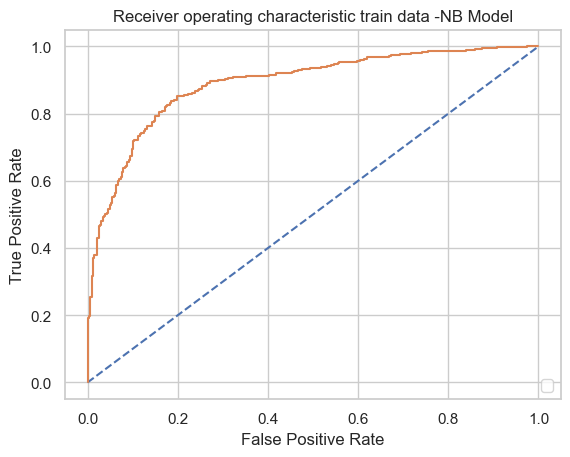

In [117]:
probs = NB_model.predict_proba(X_train_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train_NB, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_trainthresholds = roc_curve(y_train_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -NB Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [118]:
## Performance Matrix on test data set
y_test_predict_NB = NB_model.predict(X_test_NB)
model_score_NB_Test = NB_model.score(X_test_NB, y_test_NB)                      ## Accuracy
print(model_score_NB_Test)
print(metrics.confusion_matrix(y_test_NB, y_test_predict_NB))          ## confusion_matrix
print(metrics.classification_report(y_test_NB, y_test_predict_NB))     ## classification_report


0.8362445414847162
[[ 99  35]
 [ 40 284]]
              precision    recall  f1-score   support

       False       0.71      0.74      0.73       134
        True       0.89      0.88      0.88       324

    accuracy                           0.84       458
   macro avg       0.80      0.81      0.80       458
weighted avg       0.84      0.84      0.84       458



In [120]:
from sklearn.metrics import precision_score, recall_score, f1_score

NB_train_precision = precision_score(y_train_NB, y_train_predict_NB, pos_label=1)
NB_train_recall = recall_score(y_train_NB, y_train_predict_NB, pos_label=1)
NB_train_f1 = f1_score(y_train_NB, y_train_predict_NB, pos_label=1)

print('NB_train_precision:', round(NB_train_precision, 2))
print('NB_train_recall:', round(NB_train_recall, 2))
print('NB_train_f1:', round(NB_train_f1, 2))


NB_train_precision: 0.88
NB_train_recall: 0.9
NB_train_f1: 0.89


In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score

NB_test_precision = precision_score(y_test_NB, y_test_predict_NB, pos_label=1)
NB_test_recall = recall_score(y_test_NB, y_test_predict_NB, pos_label=1)
NB_test_f1 = f1_score(y_test_NB, y_test_predict_NB, pos_label=1)

print('NB_test_precision:', round(NB_test_precision, 2))
print('NB_test_recall:', round(NB_test_recall, 2))
print('NB_test_f1:', round(NB_test_f1, 2))


NB_test_precision: 0.89
NB_test_recall: 0.88
NB_test_f1: 0.88


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.889


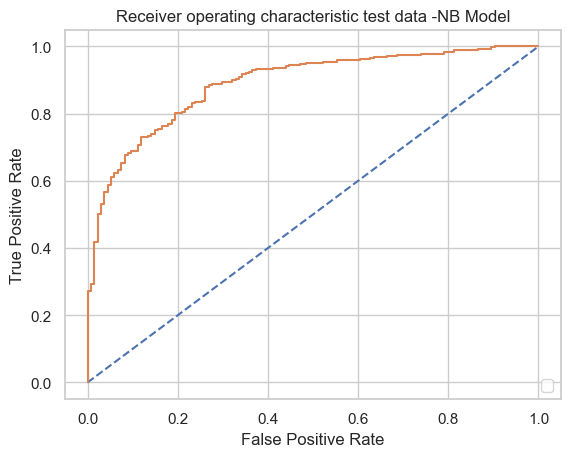

In [122]:
probs = NB_model.predict_proba(X_test_NB)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test_NB, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_testthresholds = roc_curve(y_test_NB, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -NB Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [123]:
print('Classification Report of the training data in NB_model:\n\n',metrics.classification_report(y_train_NB,y_train_predict_NB),'\n')
print('Classification Report of the test data in NB_model:\n\n',metrics.classification_report(y_test_NB,y_test_predict_NB),'\n')

Classification Report of the training data in NB_model:

               precision    recall  f1-score   support

       False       0.76      0.73      0.74       328
        True       0.88      0.90      0.89       739

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 

Classification Report of the test data in NB_model:

               precision    recall  f1-score   support

       False       0.71      0.74      0.73       134
        True       0.89      0.88      0.88       324

    accuracy                           0.84       458
   macro avg       0.80      0.81      0.80       458
weighted avg       0.84      0.84      0.84       458
 



Accuracy of our Gaussian Naive Bayes model

In [124]:
NB_model.score(X_train_NB, y_train_NB)

0.8434864104967198

In [125]:
NB_model.score(X_test_NB, y_test_NB)

0.8362445414847162

ROC-AUC Scores:
Train Set :88% |Test set: 88%

Inferences: The Naives model is fairly generalised (have similar accuracy and ROC-AUC scores for train and test set.

### KNN and Naive Bayes Comparision

In [139]:
# Assuming you have already calculated and stored the AUC scores
knn_train_auc = 0.9  # Replace with your actual value
knn_test_auc = 0.85  # Replace with your actual value

# KNN Model
print(f'Accuracy on Train set KNN: {knn.score(x_train_scaled, y_train):.2f}')
print(f'Accuracy on Test set KNN: {knn.score(x_test_scaled, y_test):.2f}')
print(f'AUC Score on Train set - KNN: {np.round(knn_train_auc, 2)}')
print(f'AUC Score on Test set - KNN: {np.round(knn_test_auc, 2)}')



from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Assuming you have training data (x_train, y_train) and testing data (x_test, y_test)

# Define and train Naive Bayes model
nb = GaussianNB()
nb.fit(x_train, y_train)

# Calculate AUC scores
nb_train_auc = roc_auc_score(y_train, nb.predict_proba(x_train)[:, 1])
nb_test_auc = roc_auc_score(y_test, nb.predict_proba(x_test)[:, 1])

# Print results
print(f'Accuracy on Train set Naive Bayes: {nb.score(x_train, y_train):.2f}')
print(f'Accuracy on Test set Naive Bayes: {nb.score(x_test, y_test):.2f}')
print(f'AUC Score on Train set - Naive Bayes: {np.round(nb_train_auc, 2)}')
print(f'AUC Score on Test set - Naive Bayes: {np.round(nb_test_auc, 2)}')

Accuracy on Train set KNN: 0.85
Accuracy on Test set KNN: 0.84
AUC Score on Train set - KNN: 0.9
AUC Score on Test set - KNN: 0.85
Accuracy on Train set Naive Bayes: 0.85
Accuracy on Test set Naive Bayes: 0.82
AUC Score on Train set - Naive Bayes: 0.89
AUC Score on Test set - Naive Bayes: 0.88


#### Bagging

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [142]:
rf_train_pred = rf.predict(x_train)
rf_train_score = rf.score(x_train, y_train)

print('\033[1m', 'Random Forest Train Set', '\033[0m')
print('\033[96m', rf_train_score)
print(confusion_matrix(y_train, rf_train_pred))
print(classification_report(y_train, rf_train_pred))

 Random Forest Train Set 
 0.9990627928772259
[[330   1]
 [  0 736]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       331
        True       1.00      1.00      1.00       736

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [143]:
rf_test_pred = rf.predict(x_test)
rf_test_score = rf.score(x_test, y_test)
print(rf_test_score)
print(confusion_matrix(y_test, rf_test_pred))
print(classification_report(y_test, rf_test_pred))

0.8296943231441049
[[ 88  43]
 [ 35 292]]
              precision    recall  f1-score   support

       False       0.72      0.67      0.69       131
        True       0.87      0.89      0.88       327

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



In [144]:
from sklearn.ensemble import BaggingClassifier

In [146]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming you have x_train and y_train defined
# You may need to adjust hyperparameters and other settings based on your needs

base_rf_model = RandomForestClassifier()  # This is the base model
Bagging_RF = BaggingClassifier(base_rf_model, n_estimators=10)  # You can adjust the number of estimators

# Now, you can fit the Bagging_RF model
Bagging_RF.fit(x_train, y_train)


BaggingClassifier(estimator=RandomForestClassifier())

In [147]:
Bagging_RF.score(x_train, y_train)

0.9643861293345829

In [148]:
rfbag_train_pred = Bagging_RF.predict(x_train)
print(confusion_matrix(y_train, rfbag_train_pred))

[[304  27]
 [ 11 725]]


In [149]:
print(classification_report(y_train, rfbag_train_pred))

              precision    recall  f1-score   support

       False       0.97      0.92      0.94       331
        True       0.96      0.99      0.97       736

    accuracy                           0.96      1067
   macro avg       0.96      0.95      0.96      1067
weighted avg       0.96      0.96      0.96      1067



In [150]:
rfbag_test_pred = Bagging_RF.predict(x_test)
rfbag_test_score = Bagging_RF.score(x_test, y_test)
print(rfbag_test_score)
print(confusion_matrix(y_test, rfbag_test_pred))
print(classification_report(y_test, rfbag_test_pred))

0.8362445414847162
[[ 86  45]
 [ 30 297]]
              precision    recall  f1-score   support

       False       0.74      0.66      0.70       131
        True       0.87      0.91      0.89       327

    accuracy                           0.84       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.84      0.83       458



AUC for the Train  (Bagging) :  0.9958582359122554


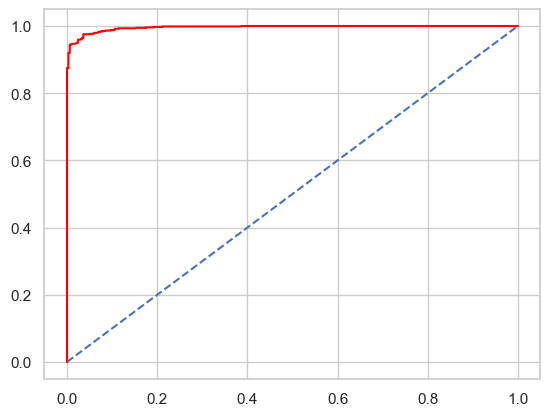

In [151]:
probs = Bagging_RF.predict_proba(x_train)
probs = probs[:,1]

bag_train_auc = roc_auc_score(y_train, probs)
print('AUC for the Train  (Bagging) : ',  bag_train_auc)

bag_train_fpr, bag_train_tpr, bag_train_threesholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(bag_train_fpr, bag_train_tpr, color= 'red')


AUC for the Test  (Bagging) :  0.8984055839577935


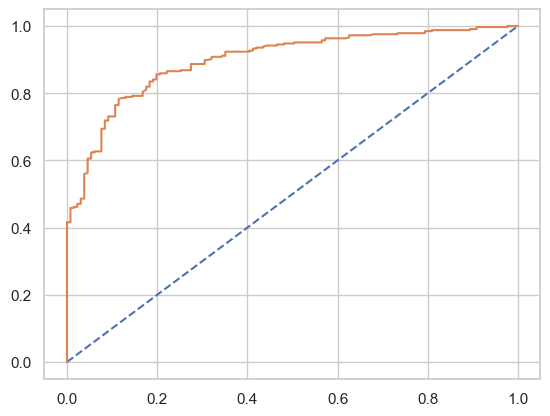

In [152]:
probs = Bagging_RF.predict_proba(x_test)
probs = probs[:,1]

bag_test_auc = roc_auc_score(y_test, probs)
print('AUC for the Test  (Bagging) : ',  bag_test_auc)

bag_test_fpr, bag_test_tpr, bag_test_threesholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(bag_test_fpr, bag_test_tpr)


In [153]:
print('Accuracy on Train set Bagging Classifier : %.2f' %  Bagging_RF.score(x_train, y_train))
print('Accuracy on Test set Bagging Classifier : %.2f' %  Bagging_RF.score(x_test, y_test))

Accuracy on Train set Bagging Classifier : 0.96
Accuracy on Test set Bagging Classifier : 0.84


#### Boosting

In [154]:
from sklearn.ensemble import AdaBoostClassifier

In [160]:
import sklearn
print(sklearn.__version__)


1.4.0


In [161]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [165]:
X_train_gbcl,X_test_gbcl,y_train_gbcl,y_test_gbcl=train_test_split(X,y,test_size=.30,random_state=0)

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 500,random_state=100)
gbcl = gbcl.fit(X_train_gbcl, y_train_gbcl)

0.9953139643861293


<Axes: >

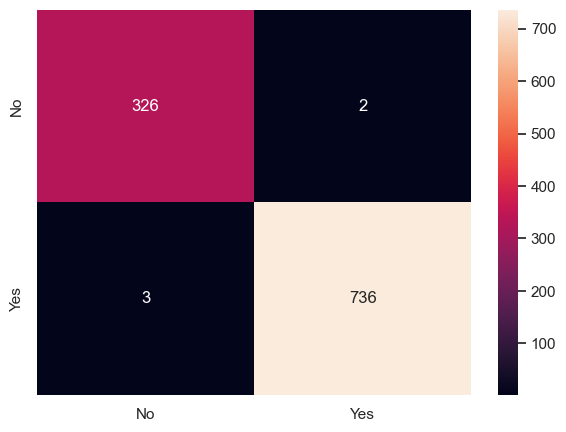

In [167]:
y_predict = gbcl.predict(X_train_gbcl)
print(gbcl.score(X_train_gbcl, y_train_gbcl))
cm=metrics.confusion_matrix(y_train_gbcl, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.7947598253275109


<Axes: >

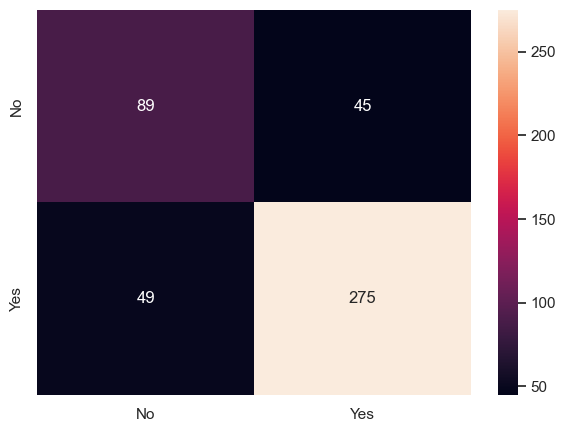

In [168]:
y_predict = gbcl.predict(X_test_gbcl)
print(gbcl.score(X_test_gbcl, y_test_gbcl))
cm=metrics.confusion_matrix(y_test_gbcl, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a dataset X and y for your machine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a GradientBoostingClassifier (example model)
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

# Predict on the training set
y_predict_train = gb_clf.predict(X_train)

# Calculate and print metrics
accuracy = accuracy_score(y_train, y_predict_train)
precision = precision_score(y_train, y_predict_train, average='weighted')
recall = recall_score(y_train, y_predict_train, average='weighted')
f1 = f1_score(y_train, y_predict_train, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


In [177]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have a dataset X and y for your machine learning model
X_train, X_test, y_train_gbcl, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a GradientBoostingClassifier (example model)
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train_gbcl)

# Predict on the training set
y_predict_train = gb_clf.predict(X_train)

# Print classification report
print(classification_report(y_train_gbcl, y_predict_train))


              precision    recall  f1-score   support

       False       0.87      0.82      0.85       373
        True       0.92      0.95      0.94       847

    accuracy                           0.91      1220
   macro avg       0.90      0.89      0.89      1220
weighted avg       0.91      0.91      0.91      1220



In [179]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have a dataset X and y for your machine learning model
X_train, X_test, y_train_gbcl, y_test_gbcl = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a GradientBoostingClassifier (example model)
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train_gbcl)

# Predict on the test set
y_predict_test = gb_clf.predict(X_test)

# Print classification report for the test set
print(classification_report(y_test_gbcl, y_predict_test))


              precision    recall  f1-score   support

       False       0.67      0.58      0.62        89
        True       0.84      0.88      0.86       216

    accuracy                           0.79       305
   macro avg       0.75      0.73      0.74       305
weighted avg       0.79      0.79      0.79       305



Area under Curve Gradient Boosting Classifier is 0.9634730368339922


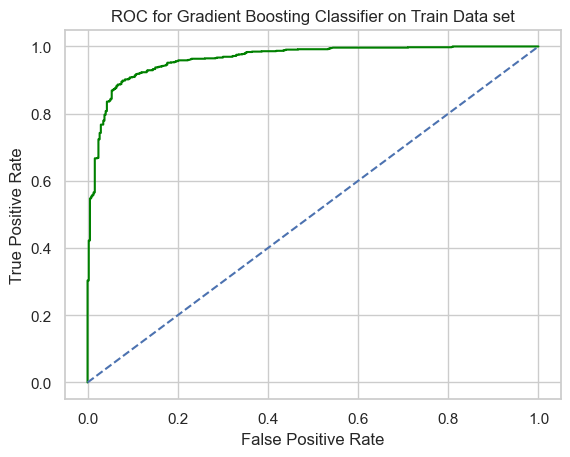

In [181]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have a GradientBoostingClassifier model (gbcl) and training data (X_train_gbcl)
train_gbcl_fpr, train_gbcl_tpr, _ = roc_curve(y_train_gbcl, gb_clf.predict_proba(X_train)[:, 1])

plt.plot(train_gbcl_fpr, train_gbcl_tpr, color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gradient Boosting Classifier on Train Data set')

train_gbcl_auc = roc_auc_score(y_train_gbcl, gb_clf.predict_proba(X_train)[:, 1])
print('Area under Curve Gradient Boosting Classifier is', train_gbcl_auc)
plt.show()


Area under Curve Gradient Boosting Classifier is 0.8737515605493134


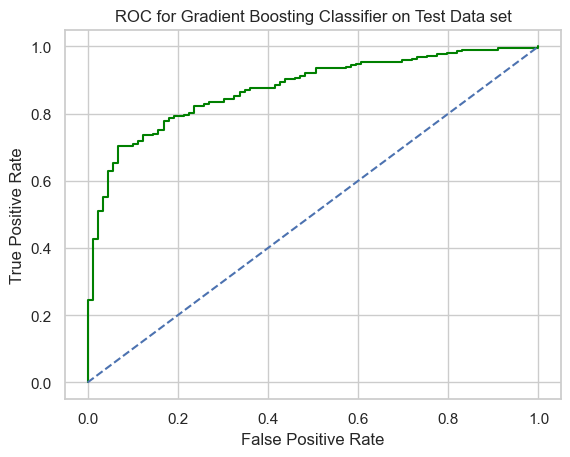

In [183]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have a GradientBoostingClassifier model (gbcl) and test data (X_test_gbcl)
test_gbcl_fpr, test_gbcl_tpr, _ = roc_curve(y_test_gbcl, gb_clf.predict_proba(X_test)[:, 1])

plt.plot(test_gbcl_fpr, test_gbcl_tpr, color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gradient Boosting Classifier on Test Data set')

test_gbcl_auc = roc_auc_score(y_test_gbcl, gb_clf.predict_proba(X_test)[:, 1])
print('Area under Curve Gradient Boosting Classifier is', test_gbcl_auc)
plt.show()


ROC -AUC scores: Train set:96 % | Test set:87%

Feature: 0, Score: 0.20179
Feature: 1, Score: 0.07087
Feature: 2, Score: 0.04898
Feature: 3, Score: 0.02130
Feature: 4, Score: 0.14029
Feature: 5, Score: 0.28412
Feature: 6, Score: 0.12895
Feature: 7, Score: 0.09664
Feature: 8, Score: 0.00705


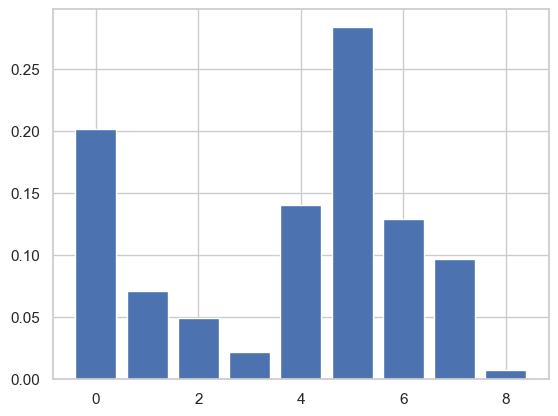

In [190]:
# get importance
import matplotlib.pyplot as plt
importance = gbcl.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)

# Show the plot
plt.show()


Inference:
1. Gender and economic condition (household) have minimal impact on predicting votes:
-The influence of both gender and household economic condition on vote prediction is negligible.
-These factors contribute very little to understanding voting patterns, based on the model.
-While other variables are more significant, gender and household financial status play a minor role in influencing votes.

2. Age remains a strong predictor of votes:
-Age continues to be a relevant factor in understanding voting behavior.
-The model finds that age is still a crucial variable for predicting votes.
-Amongst the analyzed variables, age retains its significance in influencing how people vote.

3. Untuned model exhibits overfitting:
-The model without hyperparameter tuning shows signs of overfitting.
-The unoptimized model struggles to generalize well, indicating overfitting.
-The lack of tuning has led to overfitting, which limits the model's performance on unseen data.

### Problem 1 :- Model Performance improvement

#### Model Tuning

#### 1. BOOSTING

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
X_train_gbcl,X_test_gbcl,y_train_gbcl,y_test_gbcl=train_test_split(X,y,test_size=.30,random_state=0)

In [193]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 75,max_depth=5,learning_rate=0.05,min_samples_split=10,random_state=1)
gbcl = gbcl.fit(X_train_gbcl, y_train_gbcl)


In [194]:
param_grid={'learning_rate':[0.05,0.075,0.1,0.2],'max_depth':[5,6,7,8],'min_impurity_split':[5,6,7,8,9,10],'n_estimators':[50,75],'random_state':[100]}

In [195]:
grid_search = GridSearchCV(estimator=gbcl,param_grid = param_grid)
gbcl.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 75,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have X_train_gbcl and y_train_gbcl defined
# You may need to adjust hyperparameters and other settings based on your needs

# Create a GradientBoostingClassifier
gbcl = GradientBoostingClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gbcl, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_gbcl, y_train_gbcl)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [200]:
best_grid_gb= grid_search.best_estimator_

In [201]:
best_grid_gb

GradientBoostingClassifier(learning_rate=0.2, n_estimators=50)

In [202]:

# Predicting the Training and Testing data
ytrain_predict = best_grid_gb.predict(X_train_gbcl)
ytest_predict = best_grid_gb.predict(X_test_gbcl)


In [203]:
# Gradient Boosting Tuned Model Performance Evaluation on Training data
confusion_matrix(y_train_gbcl,ytrain_predict)

array([[273,  55],
       [ 47, 692]], dtype=int64)

In [204]:
ADABOOSTGRID_train_acc=best_grid_gb.score(X_train_gbcl,y_train_gbcl) 
ADABOOSTGRID_train_acc
print(classification_report(y_train_gbcl,ytrain_predict))


              precision    recall  f1-score   support

       False       0.85      0.83      0.84       328
        True       0.93      0.94      0.93       739

    accuracy                           0.90      1067
   macro avg       0.89      0.88      0.89      1067
weighted avg       0.90      0.90      0.90      1067



In [205]:
ADABOOSTGRID_test_acc=best_grid_gb.score(X_test_gbcl,y_test_gbcl) 
ADABOOSTGRID_test_acc
print(classification_report(y_test_gbcl,ytest_predict))

              precision    recall  f1-score   support

       False       0.69      0.71      0.70       134
        True       0.88      0.87      0.87       324

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.82      0.82      0.82       458



Area under Curve Gradient Boosting Classifier is 0.9630433347635237


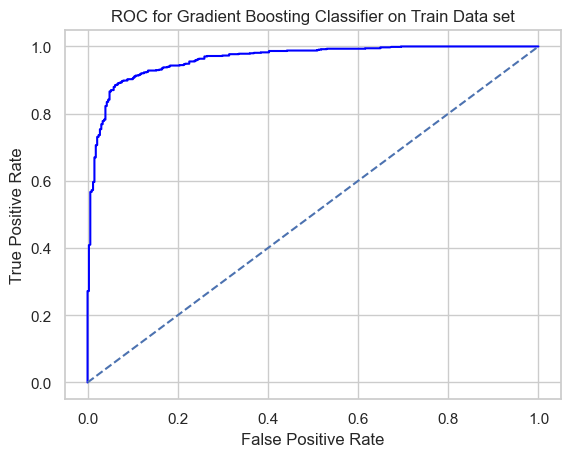

In [207]:
train_gbcl_fpr, train_gbcl_tpr,_=roc_curve(y_train_gbcl,best_grid_gb.predict_proba(X_train_gbcl)[:,1])
plt.plot(train_gbcl_fpr,train_gbcl_tpr,color='blue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gradient Boosting Classifier on Train Data set')
train_gbcl_auc=roc_auc_score(y_train_gbcl,best_grid_gb.predict_proba(X_train_gbcl)[:,1])
print('Area under Curve Gradient Boosting Classifier is', train_gbcl_auc)

Area under Curve  Tuned Gradient Boosting Classifier is 0.8896144278606964


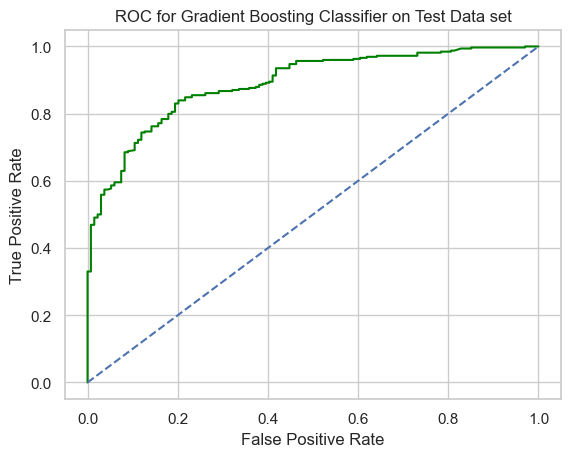

In [208]:
test_gbcl_fpr, test_gbcl_tpr,_=roc_curve(y_test_gbcl,best_grid_gb.predict_proba(X_test_gbcl)[:,1])
plt.plot(test_gbcl_fpr,test_gbcl_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gradient Boosting Classifier on Test Data set')
test_gbcl_auc=roc_auc_score(y_test_gbcl,best_grid_gb.predict_proba(X_test_gbcl)[:,1])
print('Area under Curve  Tuned Gradient Boosting Classifier is', test_gbcl_auc)

#### 2. BAGGING

In [209]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [210]:
#Import svm model
from sklearn.svm import SVC

In [211]:
# Split X and y into training and test set in 70:30 ratio

X_train_bag, X_test_bag, y_train_bag, y_test_bag = train_test_split(XScaled, y, test_size=0.30, random_state=0)


In [212]:
svc = SVC(probability=True)
param_grid = {'kernel':['linear','rbf','poly'],'C':[10.0,1, 0.1],'gamma':[0.2,0.3,0.4,0.5,0.6],'degree':[2,3]}
svc = SVC(probability=True)



In [213]:
svc = SVC(probability=True)
param_grid = {'kernel':['rbf'],'C':[10.0,1, 0.1],'gamma':[0.2,0.3,0.4,0.5,0.6],'degree':[2,3]}
svc = SVC(probability=True)

In [214]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [215]:
grid_search.fit(X_train_bag,y_train_bag)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [216]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}

In [217]:
best_grid_bag= grid_search.best_estimator_


In [218]:
best_grid_bag

GradientBoostingClassifier(learning_rate=0.2, n_estimators=50)

In [219]:
# Predicting the Training and Testing data
ytrain_predict = best_grid_bag.predict(X_train_bag)
ytest_predict = best_grid_bag.predict(X_test_bag)


In [220]:
# SVM Tuned Model Performance Evaluation on Training data
confusion_matrix(y_train_bag,ytrain_predict)
SVMGRID_train_acc=best_grid_bag.score(X_train_bag,y_train_bag) 
SVMGRID_train_acc

0.9044048734770385

In [221]:
print(classification_report(y_train_bag,ytrain_predict))


              precision    recall  f1-score   support

       False       0.85      0.83      0.84       328
        True       0.93      0.94      0.93       739

    accuracy                           0.90      1067
   macro avg       0.89      0.88      0.89      1067
weighted avg       0.90      0.90      0.90      1067



In [222]:
print(classification_report(y_test_bag,ytest_predict))

              precision    recall  f1-score   support

       False       0.69      0.71      0.70       134
        True       0.88      0.87      0.87       324

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.82      0.82      0.82       458



Area under Curve is 0.9630433347635237


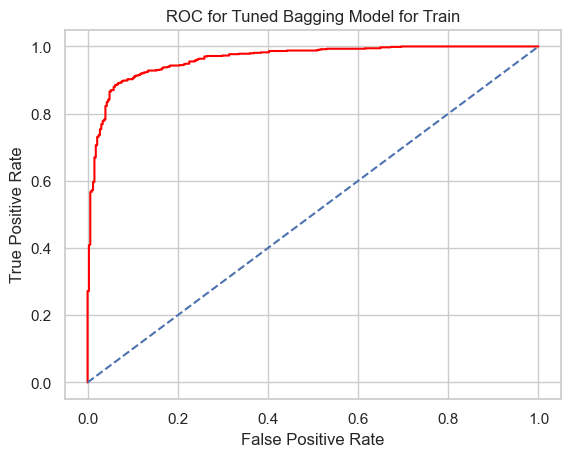

In [229]:

BAGGRID_train_fpr, BAGGRID_train_tpr,_=roc_curve(y_train_bag,best_grid_bag.predict_proba(X_train_bag)[:,1])
plt.plot(BAGGRID_train_fpr,BAGGRID_train_tpr,color='RED')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Tuned Bagging Model for Train')
BAGGRID_train_auc=roc_auc_score(y_train_bag,best_grid_bag.predict_proba(X_train_bag)[:,1])
print('Area under Curve is', BAGGRID_train_auc)

Area under Curve is 0.890650912106136


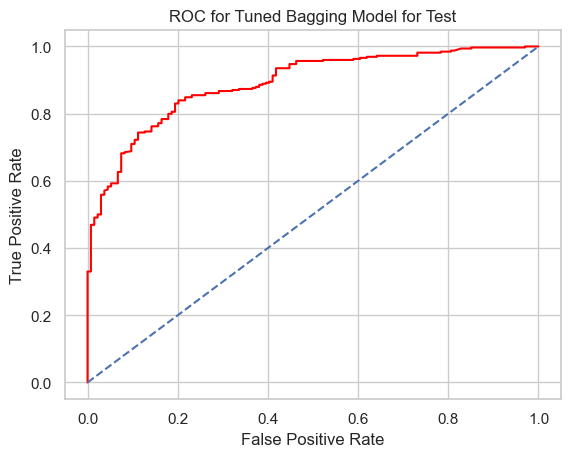

In [230]:

BAGGRID_test_fpr, BAGGRID_test_tpr,_=roc_curve(y_test_bag,best_grid_bag.predict_proba(X_test_bag)[:,1])
plt.plot(BAGGRID_test_fpr,BAGGRID_test_tpr,color='RED')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Tuned Bagging Model for Test')
BAGGRID_test_auc=roc_auc_score(y_test_bag,best_grid_bag.predict_proba(X_test_bag)[:,1])
print('Area under Curve is', BAGGRID_test_auc)

ROC -AUC scores: Train set:96% | Test set:89%

### Important features in the final model and draw inferences.

In [225]:
import matplotlib.colors as mcolors

Feature: 0, Score: 0.10683
Feature: 1, Score: 0.05175
Feature: 2, Score: 0.04531
Feature: 3, Score: 0.01085
Feature: 4, Score: 0.17667
Feature: 5, Score: 0.35945
Feature: 6, Score: 0.14364
Feature: 7, Score: 0.10113
Feature: 8, Score: 0.00439


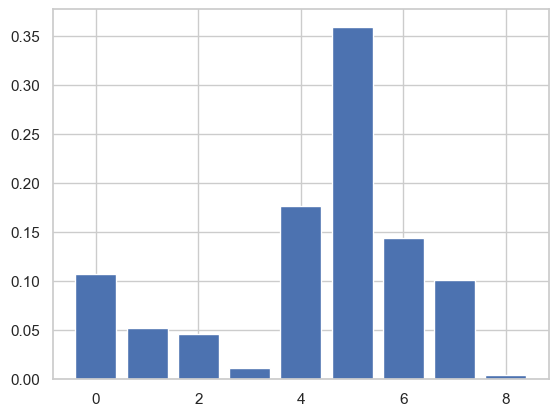

In [231]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming best_grid_bag is your tuned Bagging Classifier
importance = best_grid_bag.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


Inferences:
1. Overfitting in Untuned Bagging Classifier:
The lack of hyperparameter tuning leads to severe overfitting in the bagging classifier, as evidenced by the substantial gap between training and test set accuracy and ROC-AUC scores. This indicates the model memorizes training data poorly generalizing to unseen data.
Without adjusting hyperparameters, the bagging classifier heavily overfits, resulting in a significant performance difference between training and testing, rendering it unreliable for general use.

2. Hyperparameter Tuning Rescues Overfitting:
Hyperparameter tuning effectively addresses the overfitting issue, leading to a generalized model with consistent accuracy and ROC-AUC scores across both training and test sets. This signifies the model's ability to perform well on unseen data.
Optimization of hyperparameters successfully mitigates overfitting in the bagging classifier, yielding a robust and generalizable model with near-identical performance on both training and testing data.

3. Hague Identified as Most Important Variable:
According to the tuned bagging model, the "Hague" variable holds the most prominent influence on the predicted outcome. This suggests a strong association between this variable and the target variable.
Hyperparameter tuning reveals "Hague" as the critical predictor within the bagging model, implying a substantial impact on the predicted outcome. Further investigation into this variable's nature and relationship with the target variable is recommended.

### Problem 1 :- Final Model Selection

Before Tuning: 
Both Bagging and Boosting exhibit relatively high accuracy and AUC scores on the test set, with Bagging having slightly better precision and recall for class 1 (assuming it represents the positive class).
Boosting shows significant overfitting with a large gap between training and test set performance in most metrics, despite higher training scores.
Naive Bayes lags behind in various metrics compared to Bagging and Boosting.

After Tuning:

Both Boosting and Bagging achieve similar performance across all metrics on the test set, indicating strong generalizability after addressing overfitting issues in Boosting.
Precision remains slightly higher for Bagging, while recall for class 1 remains marginally better for Boosting. F1-scores are almost identical.

Considerations:

Class Imbalance: If class imbalance exists, the choice might lean towards the model performing better on the minority class (likely class 1 based on the higher recall).
Computational Resources: If training and prediction time are crucial, Bagging might be preferable due to its generally faster performance.
Interpretability: If understanding the model's decisions is essential, Bagging offers a simpler structure compared to Boosting's complexity.


BAGGING might be preferred choice in this specific scenario.

### Problem 2:- Define the problem and Perform Exploratory Data Analysis

In [232]:
#importing libraries and the data
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
nltk.download('punkt')
inaugural.fileids()
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
import numpy as np
import pandas as pd
import nltk
import random
import string

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [233]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 812.7 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00


In [234]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

To find out the no. of characters:- we use the raw() function,the number of words uisng word() function and sentences using sents() function using inaugural corpora.

In [235]:
# To see the speech of leaders with the year can be seen using .raw()
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [236]:
print(inaugural.words('1941-Roosevelt.txt'))
print(inaugural.words ('1961-Kennedy.txt'))
print(inaugural.words ('1973-Nixon.txt'))

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]
['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]
['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]


In [237]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [238]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [239]:
#creating a variable for each of the specific speeches to do the analysis
df_Roosevelt= inaugural.raw('1941-Roosevelt.txt')
df_Kennedy = inaugural.raw('1961-Kennedy.txt')
df_Nixon = inaugural.raw('1973-Nixon.txt')

In [240]:
print(len(inaugural.raw('1941-Roosevelt.txt')))

7571


The number of character in '1941 Roosevelt.txt'of Inaugural is 7571.

In [241]:
print(len(inaugural.raw('1961-Kennedy.txt')))

7618


The number of character in "1961 Kennedy.txt' of Inaugural is 7618.

In [243]:
print(len(inaugural.raw('1973-Nixon.txt')))

9991


The number of character in '1961 Kennedy.txt'of Inaugural is 9991.

In [244]:
print(len(inaugural.words('1941-Roosevelt.txt')))

1536


The number of words in '1941-Roosevelt.txt' are 1536.

In [246]:
print(len(inaugural.words('1961-Kennedy.txt')))

1546


The number of words in '1961-Kennedy.txt' are 1546

In [247]:
print(len(inaugural.words('1973-Nixon.txt')))

2028


The number of words in '1973-Nixon.txt' are 2028.

In [248]:
print(len(inaugural.sents('1941-Roosevelt.txt')))

68


The number of sentences in '1941-Roosevelt' are 68.

In [249]:
print(len(inaugural.sents('1961-Kennedy.txt')))

52


The number of sentences in '1961-Kennedy.txt' are 52.

In [250]:
print(len(inaugural.sents('1973-Nixon.txt')))

69


The number of sentences in '1973-Nixon.txt' are 69.

### Problem 2 - Text cleaning

Stopwords Removal

In [252]:
import random
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Create a object named PS for the PorterStemmer

In [254]:
PS = PorterStemmer()

In [255]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) #,"us"])

Removing the stopword on '1941-Roosevelt's.txt' speech:

In [256]:
Roosevelt_lower = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
Roosevelt_clean = [word for word in Roosevelt_lower if word not in stopwords]
Roosevelt_clean_stem = [PS.stem(word) for word in Roosevelt_clean]
Roosevelt_freq = nltk.FreqDist(Roosevelt_clean_stem)

Removing the stopword on '1961-Kennedy's.txt'speech:

In [257]:
Kennedy_lower = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
Kennedy_clean = [word for word in Kennedy_lower if word not in stopwords]
Kennedy_clean_stem = [PS.stem(word) for word in Kennedy_clean]
Kennedy_freq = nltk.FreqDist(Kennedy_clean_stem)

Removing the stopword on'1973-Nixon's.txt'speech:

In [258]:
Nixon_lower = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
Nixon_clean = [word for word in Nixon_lower if word not in stopwords]
Nixon_clean_stem = [PS.stem(word) for word in Nixon_clean]
Nixon_freq = nltk.FreqDist(Nixon_clean_stem)

In [259]:
df_stopwords = pd.DataFrame(stopwords)
df_stopwords.head(5)

0
0       i
1      me
2      my
3  myself
4      we

Top three most commomn words used in all three speeches.

In [261]:
print("The top three words in Roosevelt's Speech are :\n",Roosevelt_freq.most_common(3))

The top three words in Roosevelt's Speech are :
 [('nation', 17), ('know', 10), ('peopl', 9)]


In [262]:
print("The top three words in Kennedy's Speech are :\n",Kennedy_freq.most_common(3))

The top three words in Kennedy's Speech are :
 [('let', 16), ('us', 12), ('power', 9)]


In [263]:
print("The top three words in Nixon's Speech are :\n",Nixon_freq.most_common(3))

The top three words in Nixon's Speech are :
 [('us', 26), ('let', 22), ('america', 21)]


### Problem 2 - Plot Word cloud of all three speeches

Wordclouds can be plotted using wordcloud python package .

The resulted wordcloud for the three speeches are illustrated below.

In [264]:
df_roosevelt = pd.DataFrame({"Roosevelt":[inaugural.raw('1941-Roosevelt.txt')]})
df_kennedy =  pd.DataFrame({"Kennedy":[inaugural.raw('1961-Kennedy.txt')]})
df_nixon =  pd.DataFrame({"Nixon":[inaugural.raw('1973-Nixon.txt')]})

Sample text after stopwords removal

Stpwords are the frequently occuring words that do not add value to the analysis and hence should be removed .
NLTK package has an inbuilt list of 179 "stopwords".
We will use this list to remove any occurenec of such words from the documents .
Also it is advised to convert all the words to lower case ,remove all numerical characters ,and punctuation marks from the document as a part of pre-processing step .

In [266]:
from wordcloud import WordCloud
words_roosevelt = ' '.join(df_roosevelt['Roosevelt'])
cleaned_word_roosevelt = " ".join([word for word in words_roosevelt.split()
                            if word not in stopwords
                            ])
cleaned_word_roosevelt


'On national day inauguration since 1789, people renewed sense dedication United States. In Washington\'s day task people create weld together nation. In Lincoln\'s day task people preserve Nation disruption within. In day task people save Nation institutions disruption without. To us come time, midst swift happenings, pause moment take stock recall place history been, rediscover may be. If not, risk real peril inaction. Lives nations determined count years, lifetime human spirit. The life man three-score years ten: little more, little less. The life nation fullness measure live. There men doubt this. There men believe democracy, form Government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future freedom ebbing tide. But Americans know true. Eight years ago, life Republic seemed frozen fatalistic terror, proved true. We midst shock acted. We acted quickly, boldly, decisively. These later years living years frui

Wordcloud for President "Rossevelt" inaugural address in 1941

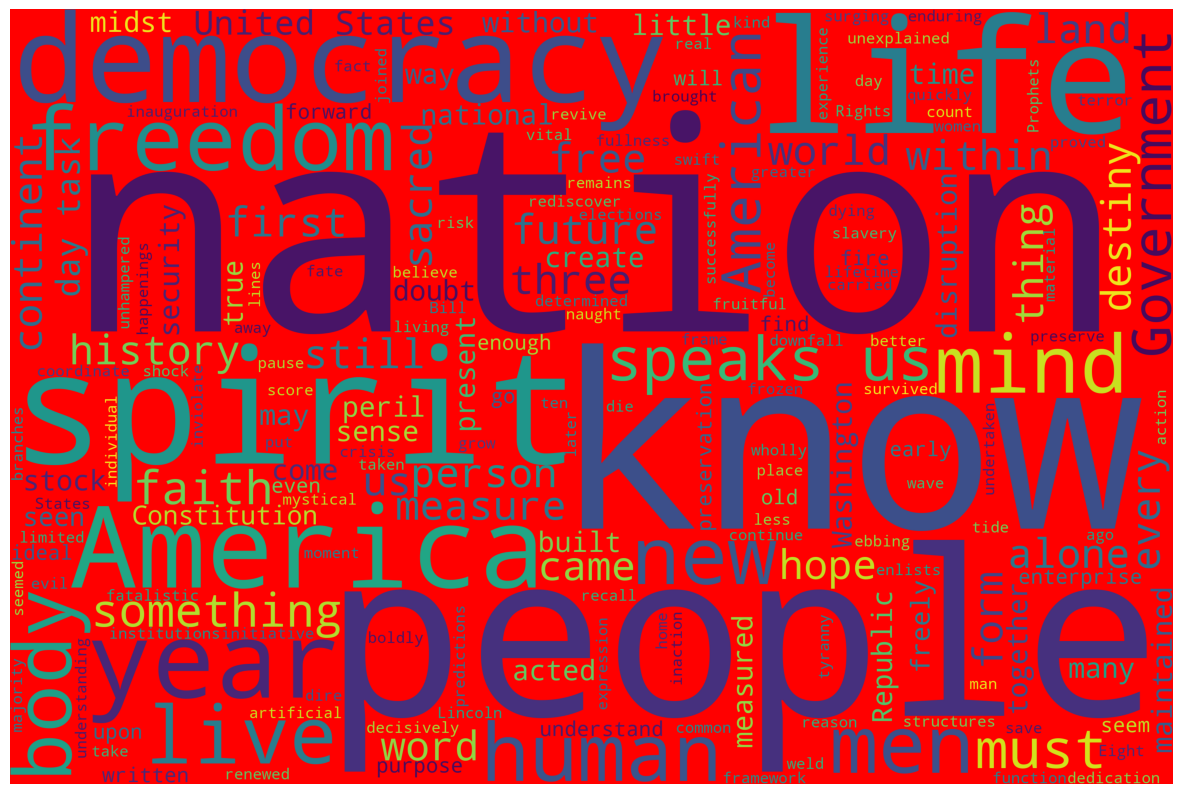

In [271]:
from wordcloud import WordCloud
words_roosevelt = ' '.join(df_roosevelt['Roosevelt'])
cleaned_word_roosevelt = " ".join([word for word in words_roosevelt.split()
                            if word not in stopwords
                            ])
wordcloud_roosevelt = WordCloud(
                      background_color='',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word_roosevelt)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_roosevelt)
plt.axis('off')
plt.show()

Sample text after stopword removal

Wordcloud for President "Kennedy" inaugural address in 1961

In [273]:
from wordcloud import WordCloud
words_kennedy = ' '.join(df_kennedy['Kennedy'])
cleaned_word_kennedy = " ".join([word for word in words_kennedy.split()
                            if word not in stopwords
                            ])
cleaned_word_kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, observe today victory party, celebration freedom symbolizing end, well beginning signifying renewal, well change. For I sworn I Almighty God solemn oath forebears l prescribed nearly century three quarters ago. The world different now. For man holds mortal hands power abolish forms human poverty forms human life. And yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state, hand God. We dare forget today heirs first revolution. Let word go forth time place, friend foe alike, torch passed new generation Americans born century, tempered war, disciplined hard bitter peace, proud ancient heritage unwilling witness permit slow undoing human rights Nation always committed, committed today home around world. Let every nation know, whether wishes us well ill, shall pay price, bear burden, meet

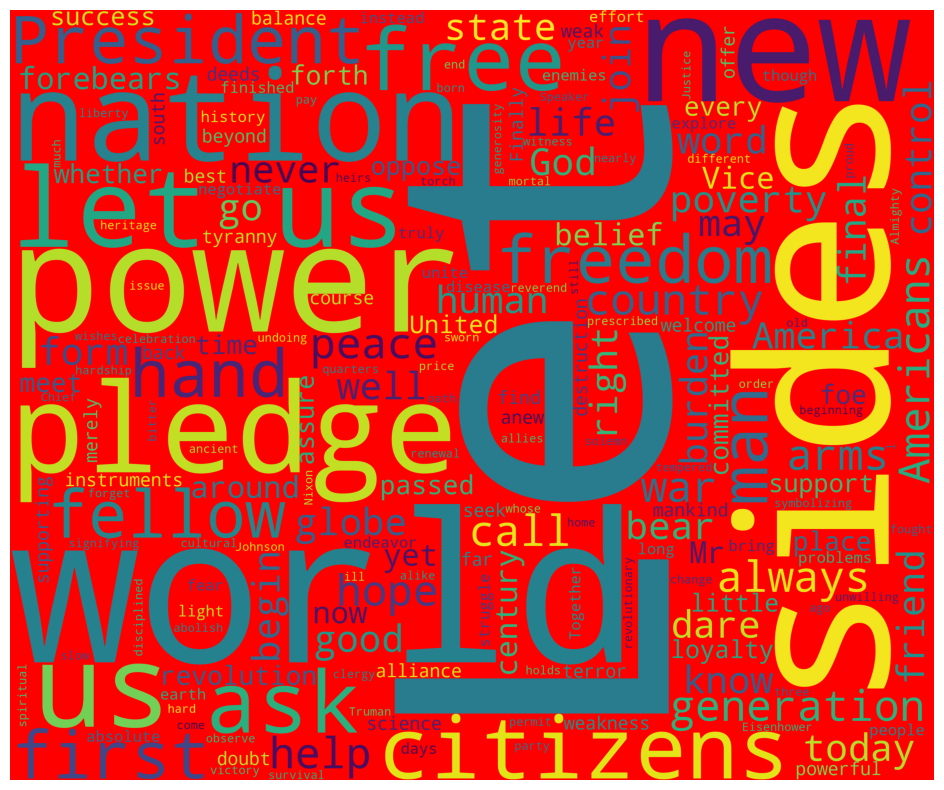

In [274]:

from wordcloud import WordCloud
words_kennedy = ' '.join(df_kennedy['Kennedy'])
cleaned_word_kennedy = " ".join([word for word in words_kennedy.split()
                            if word not in stopwords
                            ])
wordcloud_kennedy = WordCloud(
                      background_color='red',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_kennedy)
plt.figure(1,figsize=(12,10))
plt.imshow(wordcloud_kennedy)
plt.axis('off')
plt.show()


Sample text after removal of stopwords

In [275]:
from wordcloud import WordCloud
words_nixon = ' '.join(df_nixon['Nixon'])
cleaned_word_nixon = " ".join([word for word in words_nixon.split()
                            if word not in stopwords
                            ])
cleaned_word_nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, fellow citizens great good country share together: When met four years ago, America bleak spirit, depressed prospect seemingly endless war abroad destructive conflict home. As meet today, stand threshold new era peace world. The central question us is: How shall use peace? Let us resolve era enter postwar periods often been: time retreat isolation leads stagnation home invites new danger abroad. Let us resolve become: time great responsibilities greatly borne, renew spirit promise America enter third century nation. This past year saw far-reaching results new policies peace. By continuing revitalize traditional friendships, missions Peking Moscow, able establish base new durable pattern relationships among nations world. Because America\'s bold initiatives, 1972 long remembered year greatest progress since end World War II toward lasting peace world. The peace seek world flimsy peace merely interlude wa

Wordcloud for President "Nixon" inaugural address in 1973

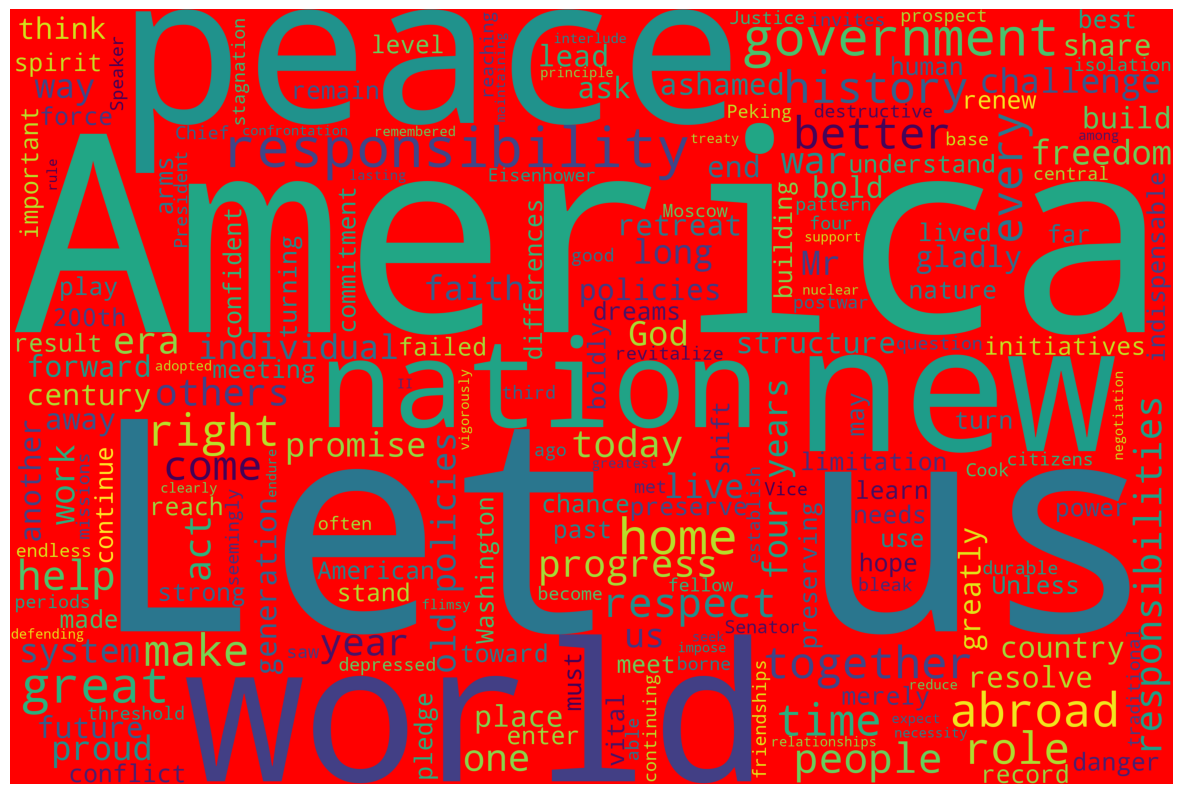

In [276]:
from wordcloud import WordCloud
words_nixon = ' '.join(df_nixon['Nixon'])
cleaned_word_nixon = " ".join([word for word in words_nixon.split()
                            if word not in stopwords
                            ])
wordcloud_nixon = WordCloud(
                      background_color='red',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word_nixon)
plt.figure(1,figsize=(15,12))
plt.imshow(wordcloud_nixon)
plt.axis('off')
plt.show()